## Classification Model with Linear Model

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

In [3]:
import parse_inputs

from pathlib import Path

import numpy as np
import pandas as pd
from pandas_plink import read_plink

from sklearn import linear_model
from sklearn.svm import SVR

from ggplot import *
PATH=Path('ddat/crowdAI/')
TMP_PATH = PATH/'tmp'
TMP_PATH.mkdir(exist_ok=True)

/home/ahmadA/anaconda3/envs/fastai/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ahmadA/anaconda3/envs/fastai/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/ahmadA/anaconda3/envs/fastai/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Build Model

## 1.2 Residual Linear Model (remove gender and nationality)

### 1.2.a Linear model (gender and nationality) as a base model

In [5]:
all_meta = pd.read_csv(TMP_PATH/'tz_and_os_meta.csv',index_col=0)
os_meta_test = pd.read_csv(TMP_PATH/'os_meta_test.csv',index_col=0)
len(all_meta),len(os_meta_test)

(3530, 137)

In [7]:
os_meta_test

FID  IID  PEDSEX  SNPSEX   STATUS         F  YCOUNT
11    11   11       0       1  PROBLEM  0.841700       0
12    12   12       0       2  PROBLEM  0.058450       0
14    14   14       0       1  PROBLEM  0.831200       0
35    35   35       0       1  PROBLEM  0.832400       0
43    43   43       0       2  PROBLEM  0.008385       0
47    47   47       0       1  PROBLEM  0.828700       0
48    48   48       0       1  PROBLEM  0.836000       0
53    53   53       0       2  PROBLEM  0.005788       0
68    68   68       0       1  PROBLEM  0.849100       0
81    81   81       0       1  PROBLEM  0.840300       0
86    86   86       0       1  PROBLEM  0.834100       0
98    98   98       0       2  PROBLEM  0.069700       0
108  108  108       0       2  PROBLEM  0.072440       0
109  109  109       0       1  PROBLEM  0.823500       0
110  110  110       0       1  PROBLEM  0.823000       0
124  124  124       0       2  PROBLEM  0.055710       0
132  132  132       0       1  PROBLEM  0.833900       0
141  141  141       0       1  PROBLEM  1.000000       0
157  157  157       0       2  PROBLEM  0.017330       0
162  162  162       0       1  PROBLEM  0.823700       0
178  178  178       0       1  PROBLEM  0.833900       0
187  187  187       0       1  PROBLEM  0.826900       0
188  188  188       0       2  PROBLEM  0.013290       0
196  196  196       0       1  PROBLEM  0.824600       0
199  199  199       0       2  PROBLEM -0.001425       0
203  203  203       0       1  PROBLEM  0.828900       0
205  205  205       0       2  PROBLEM  0.018050       0
211  211  211       0       1  PROBLEM  0.831900       0
215  215  215       0       2  PROBLEM  0.046040       0
223  223  223       0       2  PROBLEM  0.008385       0
..   ...  ...     ...     ...      ...       ...     ...
769  769  769       0       1  PROBLEM  0.831200       0
780  780  780       0       2  PROBLEM  0.035080       0
782  782  782       0       1  PROBLEM  0.842000       0
786  786  786       0       1  PROBLEM  0.824100       0
791  791  791       0       2  PROBLEM  0.034930       0
795  795  795       0       2  PROBLEM  0.029160       0
798  798  798       0       1  PROBLEM  0.827000       0
800  800  800       0       1  PROBLEM  0.887300       0
801  801  801       0       2  PROBLEM  0.017040       0
808  808  808       0       2  PROBLEM  0.021370       0
812  812  812       0       1  PROBLEM  0.826400       0
820  820  820       0       1  PROBLEM  0.840600       0
825  825  825       0       1  PROBLEM  0.833400       0
835  835  835       0       1  PROBLEM  0.819100       0
842  842  842       0       1  PROBLEM  0.853300       0
843  843  843       0       1  PROBLEM  0.839300       0
850  850  850       0       1  PROBLEM  0.845000       0
853  853  853       0       1  PROBLEM  0.827400       0
860  860  860       0       2  PROBLEM  0.021950       0
876  876  876       0       2  PROBLEM -0.015850       0
878  878  878       0       1  PROBLEM  0.851800       0
879  879  879       0       1  PROBLEM  0.833500       0
895  895  895       0       1  PROBLEM  0.840000       0
896  896  896       0       1  PROBLEM  0.833500       0
904  904  904       0       2  PROBLEM  0.029740       0
905  905  905       0       1  PROBLEM  0.832400       0
907  907  907       0       1  PROBLEM  0.839600       0
908  908  908       0       1  PROBLEM  1.000000       0
909  909  909       0       1  PROBLEM  0.843500       0
913  913  913       0       2  PROBLEM  0.037100       0

[137 rows x 7 columns]

In [148]:
#Load training data
x_train = X[['gender','nationality']]
y_train = y
x_test = df_test[['gender','nationality']]

# Instantiate a linear model
gender_nation_ml = linear_model.LinearRegression()
gender_nation_ml.fit(x_train, y_train)

# Predict the heights for the test set
heights = gender_nation_ml.predict(x_test)
#Convert heights from np.array to a list (to ensure it is JSON serializable)
heights = heights.tolist()

# Create the challenge object by authentication with crowdAI with your API_KEY
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
challenge.submit(heights)
challenge.disconnect()

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[2:08:00<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : 9183665f-d097-4bb0-a455-696718fe7b0a



          
  0% |          |[2:08:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 9183665f-d097-4bb0-a455-696718fe7b0a



          
  0% |          |[2:08:00<?]  ?% /s] A
100% |██████████|[00:01<00:00]  98.79% /s] 
          
  0% |          |[2:08:00<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (9183665f-d097-4bb0-a455-696718fe7b0a) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.418981198924 ; MSE : 59.0634560883
CrowdAI.Event.Job.COMPLETE : 9183665f-d097-4bb0-a455-696718fe7b0a	   🍺 


(array([   8.,   28.,  137.,  511., 1051., 1053.,  574.,  147.,   19.,    2.]),
 array([-25.33765, -20.31765, -15.29765, -10.27765,  -5.25765,  -0.23765,   4.78235,   9.80235,  14.82235,
         19.84235,  24.86235]),
 <a list of 10 Patch objects>)

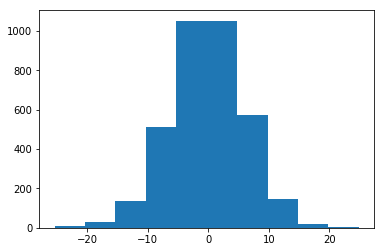

In [149]:
plt.hist(y_train-gender_nation_ml.predict(x_train))

In [150]:
base=gender_nation_ml.intercept_+np.dot(x_train,gender_nation_ml.coef_)

In [152]:
y_residual=y_train-gender_nation_ml.predict(x_train)

## Data Prepare

In [4]:
!ls {TMP_PATH}

all_bed_T.pk	       os_meta_test.csv
all_bed_T_top10000.pk  os_sub_test_bed_top10000.pk
all_bim.pk	       SNPs_GWAS_Pincrease_Residual_of_Gender.csv
all_bim_top10000.pk    SNPs_GWAS_TZ_Female.csv
all_fam.pk	       SNPs_GWAS_TZ_Male.csv
all_fam_top10000.pk    tz_and_os_meta.csv


In [5]:
all_bed_T = pd.read_pickle(TMP_PATH/'all_bed_T_top10000.pk')
os_sub_test_align =pd.read_pickle(TMP_PATH/'os_sub_test_bed_top10000.pk')

In [24]:
all_bim = pd.read_pickle(TMP_PATH/'all_bim_top10000.pk')
snps = pd.read_csv(PATH/'snps_sorted_p_val_v2.csv')
common_index = [i for i,x in enumerate(snps.snp[0:10000]) if x in set(all_bim.snp)]
common_snp_byp=snps.snp[0:10000][common_index]
all_bim_idx=[np.where(x==all_bim.snp)[0][0] for x in common_snp_byp]

In [315]:
snps.head(10000)

chr_x         snp  none      pos_x a1 a2             POS  MarkerName  \
0         3    rs724016     0  141105570  G  A  chr3:141105570    rs724016   
1         3   rs6764769     0  141100280  G  A  chr3:141100280   rs6764769   
2         3   rs6763931     0  141102833  A  G  chr3:141102833   rs6763931   
3         3   rs6440003     0  141094209  A  G  chr3:141094209   rs6440003   
4         3   rs2871960     0  141121814  C  A  chr3:141121814   rs2871960   
5         3   rs9846396     0  141140968  T  C  chr3:141140968   rs9846396   
6         3   rs7624084     0  141093285  C  T  chr3:141093285   rs7624084   
7        20   rs4911178     0   33952620  G  A  chr20:33952620   rs4911178   
8        20   rs6087704     0   34001058  C  T  chr20:34001058   rs6087704   
9        20   rs6088813     0   33975181  C  A  chr20:33975181   rs6088813   
10       20   rs6060371     0   33913322  T  G  chr20:33913322   rs6060371   
11       20   rs6060373     0   33914208  G  A  chr20:33914208   rs6060373   
12       20   rs4911494     0   33971914  C  T  chr20:33971914   rs4911494   
13       20   rs6088791     0   33907909  C  T  chr20:33907909   rs6088791   
14       20   rs1406948     0   33905619  A  G  chr20:33905619   rs1406948   
15       20    rs878639     0   33894463  G  A  chr20:33894463    rs878639   
16        3   rs7613516     0  141079309  G  T  chr3:141079309   rs7613516   
17       20   rs6060355     0   33890061  A  G  chr20:33890061   rs6060355   
18        3   rs1346408     0  141072289  T  C  chr3:141072289   rs1346408   
19        3   rs6784404     0  141073675  A  G  chr3:141073675   rs6784404   
20       12      rs8756     0   66359752  C  A  chr12:66359752      rs8756   
21        7     rs42039     0   92244422  T  C   chr7:92244422     rs42039   
22       12   rs1042725     0   66358347  C  T  chr12:66358347   rs1042725   
23        7      rs8179     0   92236164  T  C   chr7:92236164      rs8179   
24        7   rs2282978     0   92264410  C  T   chr7:92264410   rs2282978   
25       12   rs1351394     0   66351826  T  C  chr12:66351826   rs1351394   
26        4   rs1812175     0  145574844  A  G  chr4:145574844   rs1812175   
27        7      rs4272     0   92236829  G  A   chr7:92236829      rs4272   
28        4   rs7689420     0  145568352  T  C  chr4:145568352   rs7689420   
29        7   rs2282979     0   92264993  C  T   chr7:92264993   rs2282979   
...     ...         ...   ...        ... .. ..             ...         ...   
9970     10   rs7913974     0   89335977  T  C  chr10:89335977   rs7913974   
9971     16   rs1544800     0     985947  A  G    chr16:985947   rs1544800   
9972      5    rs154081     0  111028566  G  A  chr5:111028566    rs154081   
9973     17   rs2854704     0   76175824  C  A  chr17:76175824   rs2854704   
9974     17   rs9910135     0   41823402  T  C  chr17:41823402   rs9910135   
9975      1    rs946205     0  119448317  G  T  chr1:119448317    rs946205   
9976     13   rs4598779     0   40235373  C  T  chr13:40235373   rs4598779   
9977      1   rs2232816     0  171753039  A  G  chr1:171753039   rs2232816   
9978      6   rs1264423     0   30571471  T  C   chr6:30571471   rs1264423   
9979      1  rs12039471     0   65134704  T  G   chr1:65134704  rs12039471   
9980      5    rs316738     0   41645551  C  T   chr5:41645551    rs316738   
9981      5    rs889023     0  171762100  C  A  chr5:171762100    rs889023   
9982      2   rs9973704     0   37999909  G  A   chr2:37999909   rs9973704   
9983      8   rs6980834     0   24138128  T  C   chr8:24138128   rs6980834   
9984     17  rs11079563     0   63311922  A  G  chr17:63311922  rs11079563   
9985      6    rs162984     0  155632938  T  C  chr6:155632938    rs162984   
9986      1   rs3790609     0  113056990  T  C  chr1:113056990   rs3790609   
9987      5  rs11954856     0  112087327  T  G  chr5:112087327  rs11954856   
9988      6   rs2517455     0   31059900  C  T   chr6:31059900   rs2517455   
9989      6   rs2621376     

In [306]:
X_geno = all_bed_T
X_geno = X_geno.iloc[:,all_bim_idx]
X_geno.columns = list(common_snp_byp)
X_geno.fillna(-1,inplace=True)
X_meta = pd.DataFrame({'gender':list(all_meta.gender),
                       'nationality':list((all_meta.nationality=='PROBLEM').astype(np.int))},index=X_geno.index)
y = all_meta.height

Xt_geno = os_sub_test_align.T
Xt_geno = Xt_geno.iloc[:,all_bim_idx]
Xt_geno.columns = list(common_snp_byp)
#Replace nan values in the training and testing set with an arbitrary number (-1)
Xt_geno.fillna(-1,inplace=True)
Xt_meta = pd.DataFrame({'gender':pd.Series(list(os_meta_test.SNPSEX),index=Xt_geno.index),
                            'nationality':1})

/home/ahmadA/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [307]:
X = all_bed_T
X = X.iloc[:,all_bim_idx]
X.columns = common_snp_byp
X['gender']=pd.Series(list(all_meta.gender),index=X.index)
X['nationality']=pd.Series(list((all_meta.nationality=='PROBLEM').astype(np.int)),index=X.index)
X.fillna(-1,inplace=True)

y = all_meta.height

df_test = os_sub_test_align.T
df_test = df_test.iloc[:,all_bim_idx]
df_test.columns = common_snp_byp
df_test['gender']=pd.Series(list(os_meta_test.SNPSEX),index=df_test.index)
df_test['nationality']=1
#Replace nan values in the training and testing set with an arbitrary number (-1)
df_test.fillna(-1,inplace=True)

/home/ahmadA/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


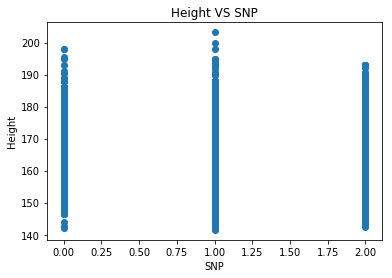

In [74]:
plt.scatter(X.iloc[:,0], y);
plt.title('Height VS SNP');
plt.xlabel('SNP');
plt.ylabel('Height');

In [12]:
def y_boolean(x,m,f,g):
    if g==1:
        return int(x>m)
    elif g==2:
        return int(x>f)
    else:
        print('error')

m50 = np.percentile(y.loc[list(X.gender==1)],50)
f50 = np.percentile(y.loc[list(X.gender==2)],50)
yb= [y_boolean(x,m50,f50,X.gender.iloc[i]) for i,x in enumerate(y)]

In [15]:
sum(yb)

1763

In [17]:
def y_triple(x,mh,ml,fh,fl,g):
    if g==1:
        if x>mh:
            return 1
        elif x<ml:
            return -1
        else:
            return 0
    elif g==2:
        if x>fh:
            return 1
        elif x<fl:
            return -1
        else:
            return 0
    else:
        print('error')

m25 = np.percentile(y.loc[list(X.gender==1)],25)
f25 = np.percentile(y.loc[list(X.gender==2)],25)
m75 = np.percentile(y.loc[list(X.gender==1)],75)
f75 = np.percentile(y.loc[list(X.gender==2)],75)
print(m25,f25,m75,f75)
yt= [y_triple(x,m75,m25,f75,f25,X.gender.iloc[i]) for i,x in enumerate(y)]

165.2 153.9 177.0 162.0


In [21]:
pd.Series(yt).value_counts()

 0    1802
-1     874
 1     854
dtype: int64

# 1. ALL Data 

## 1.1 Linear Model

In [23]:
from sklearn import linear_model
import crowdai

### 1.1.1 Linear Model with ALL data by top 10000, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10 snps

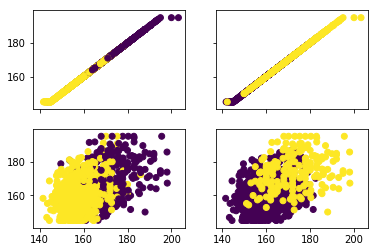

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[1:50:47<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : 58e28adc-e782-4b4d-bd46-9f4f8f5e1b9a



          
  0% |          |[1:50:47<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 58e28adc-e782-4b4d-bd46-9f4f8f5e1b9a



          
  0% |          |[1:50:48<?]  ?% /s] A
100% |██████████|[00:01<00:00]  93.13% /s] 
          
  0% |          |[1:50:48<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (58e28adc-e782-4b4d-bd46-9f4f8f5e1b9a) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.465426120415 ; MSE : 148.967866708
CrowdAI.Event.Job.COMPLETE : 58e28adc-e782-4b4d-bd46-9f4f8f5e1b9a	   🍺 


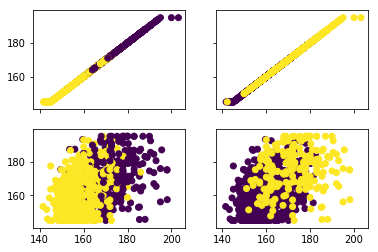

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[1:50:54<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : 36585c2a-8e5f-437d-a1fb-93d8bbc2ad07



          
  0% |          |[1:50:54<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 36585c2a-8e5f-437d-a1fb-93d8bbc2ad07



          
  0% |          |[1:50:55<?]  ?% /s] A
100% |██████████|[00:00<00:00]  107.88% /s] 
          
  0% |          |[1:50:55<?]  ?% /s] 8% /s] 


CrowdAI.Event.Job.INFO : (36585c2a-8e5f-437d-a1fb-93d8bbc2ad07) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.745872802167 ; MSE : 177.47666925
CrowdAI.Event.Job.COMPLETE : 36585c2a-8e5f-437d-a1fb-93d8bbc2ad07	   🍺 


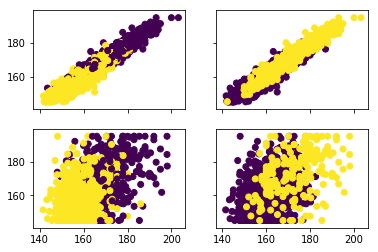

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[1:50:59<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : 1ee0e440-f171-423d-90e2-345a6a23560e



          
  0% |          |[1:51:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 1ee0e440-f171-423d-90e2-345a6a23560e



          
  0% |          |[1:51:00<?]  ?% /s] A
100% |██████████|[00:00<00:00]  108.48% /s] 
          
  0% |          |[1:51:00<?]  ?% /s] 8% /s] 


CrowdAI.Event.Job.INFO : (1ee0e440-f171-423d-90e2-345a6a23560e) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -1.0777725143 ; MSE : 211.215928697
CrowdAI.Event.Job.COMPLETE : 1ee0e440-f171-423d-90e2-345a6a23560e	   🍺 


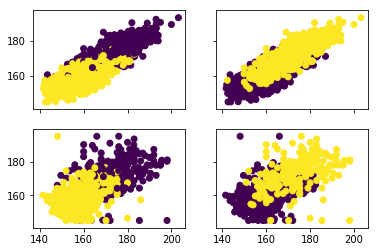

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[1:51:04<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : 0e22f068-1a13-4e2e-a3c8-56d6c1b26b08



          
  0% |          |[1:51:04<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 0e22f068-1a13-4e2e-a3c8-56d6c1b26b08



          
  0% |          |[1:51:05<?]  ?% /s] A
100% |██████████|[00:00<00:00]  109.53% /s] 
          
  0% |          |[1:51:05<?]  ?% /s] 3% /s] 


CrowdAI.Event.Job.INFO : (0e22f068-1a13-4e2e-a3c8-56d6c1b26b08) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.0706508788045 ; MSE : 94.4729687039
CrowdAI.Event.Job.COMPLETE : 0e22f068-1a13-4e2e-a3c8-56d6c1b26b08	   🍺 


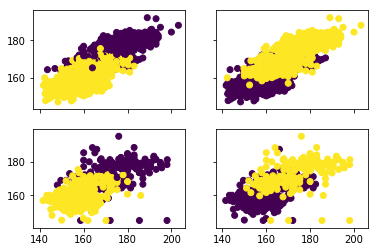

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[1:51:08<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : 56d0840d-7220-402f-a199-cc994f05d2dd



          
  0% |          |[1:51:08<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 56d0840d-7220-402f-a199-cc994f05d2dd



          
  0% |          |[1:51:09<?]  ?% /s] A
100% |██████████|[00:00<00:00]  105.90% /s] 
          
  0% |          |[1:51:09<?]  ?% /s] 0% /s] 


CrowdAI.Event.Job.INFO : (56d0840d-7220-402f-a199-cc994f05d2dd) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.160971927896 ; MSE : 85.291384034
CrowdAI.Event.Job.COMPLETE : 56d0840d-7220-402f-a199-cc994f05d2dd	   🍺 


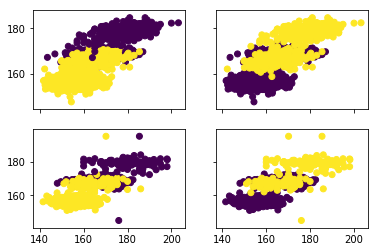

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[1:51:12<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : f7140033-2d8d-41ce-be36-691788d7f685



          
  0% |          |[1:51:12<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : f7140033-2d8d-41ce-be36-691788d7f685



          
  0% |          |[1:51:13<?]  ?% /s] A
100% |██████████|[00:00<00:00]  107.22% /s] 
          
  0% |          |[1:51:13<?]  ?% /s] 2% /s] 


CrowdAI.Event.Job.INFO : (f7140033-2d8d-41ce-be36-691788d7f685) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.355510494333 ; MSE : 65.5155694563
CrowdAI.Event.Job.COMPLETE : f7140033-2d8d-41ce-be36-691788d7f685	   🍺 


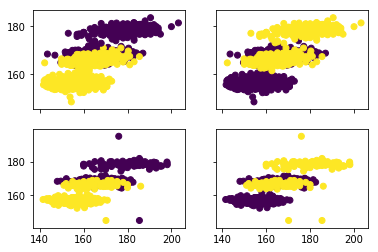

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[1:51:16<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : 7407bf19-5b8f-47c5-94b6-4deebf55cc64



          
  0% |          |[1:51:16<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 7407bf19-5b8f-47c5-94b6-4deebf55cc64



          
  0% |          |[1:51:17<?]  ?% /s] A
100% |██████████|[00:00<00:00]  103.32% /s] 
          
  0% |          |[1:51:17<?]  ?% /s] 2% /s] 


CrowdAI.Event.Job.INFO : (7407bf19-5b8f-47c5-94b6-4deebf55cc64) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.39164587572 ; MSE : 61.8422278918
CrowdAI.Event.Job.COMPLETE : 7407bf19-5b8f-47c5-94b6-4deebf55cc64	   🍺 


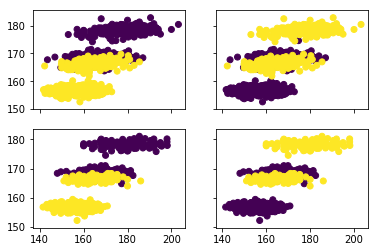

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[1:51:21<?]  ?% /s] A
          
  0% |          |[1:51:21<?]  ?% /s] A
          
  0% |          |[1:51:21<?]  ?% /s] A
100% |██████████|[00:00<00:00]  110.04% /s] 
          
  0% |          |[1:51:21<?]  ?% /s] 4% /s] 


CrowdAI.Event.Job.ENQUEUED : 6f2b1b13-67fd-45d4-8f35-05f60ed1e5d2
CrowdAI.Event.Job.RUNNING : 6f2b1b13-67fd-45d4-8f35-05f60ed1e5d2
CrowdAI.Event.Job.INFO : (6f2b1b13-67fd-45d4-8f35-05f60ed1e5d2) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.395361973874 ; MSE : 61.4644679987
CrowdAI.Event.Job.COMPLETE : 6f2b1b13-67fd-45d4-8f35-05f60ed1e5d2	   🍺 


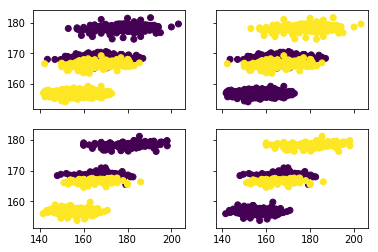

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[1:51:24<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : 7ae36a41-ae0c-4d65-a56b-88e47bb385bd



          
  0% |          |[1:51:25<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 7ae36a41-ae0c-4d65-a56b-88e47bb385bd



          
  0% |          |[1:51:25<?]  ?% /s] A
100% |██████████|[00:01<00:00]  95.83% /s] 
          
  0% |          |[1:51:25<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (7ae36a41-ae0c-4d65-a56b-88e47bb385bd) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.40534373547 ; MSE : 60.4497721978
CrowdAI.Event.Job.COMPLETE : 7ae36a41-ae0c-4d65-a56b-88e47bb385bd	   🍺 


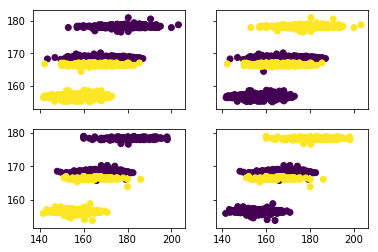

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[1:51:29<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : 1b6d7395-7b37-4a33-bc2c-729ba1f7fbae



          
  0% |          |[1:51:29<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 1b6d7395-7b37-4a33-bc2c-729ba1f7fbae



          
  0% |          |[1:51:29<?]  ?% /s] A
100% |██████████|[00:01<00:00]  95.20% /s] 
          
  0% |          |[1:51:29<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (1b6d7395-7b37-4a33-bc2c-729ba1f7fbae) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.414687814069 ; MSE : 59.4999000508
CrowdAI.Event.Job.COMPLETE : 1b6d7395-7b37-4a33-bc2c-729ba1f7fbae	   🍺 


In [122]:
score_list={}
submit={}
for n in [7726, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10]:
    var_idx = list(range(n))+list([7726,7727])
    ((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, X.iloc[:,var_idx].values, np.array(y))
    x_test = df_test.iloc[:,var_idx].values
    # Instantiate a linear model
    regr = linear_model.LinearRegression()
    regr.fit(trn, y_trn)
    

    preds = np.clip(regr.predict(trn),145,195)
    preds1 = np.clip(regr.predict(val),145,195)

    score_list[n]=(regr.score(trn, y_trn), regr.score(val, y_val))

    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
    ax1.scatter(y_trn,preds,c=trn[:,-2], marker='o')
    ax2.scatter(y_trn,preds,c=trn[:,-1], marker='o')
    ax3.scatter(y_val,preds1,c=val[:,-2], marker='o')
    ax4.scatter(y_val,preds1,c=val[:,-1], marker='o')
    plt.show()

    heights = np.clip(regr.predict(x_test),145,195).tolist()
    # Create the challenge object by authentication with crowdAI with your API_KEY
    challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
    submit[n]=challenge.submit(heights)
    challenge.disconnect()


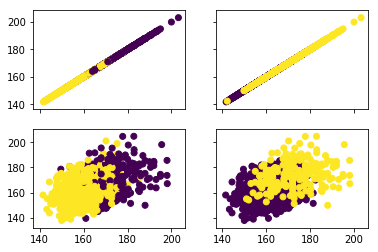

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[1:07:33<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 07410f69-f174-4620-9ece-c1a2331a5168


          
  0% |          |[1:07:33<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 07410f69-f174-4620-9ece-c1a2331a5168


          
  0% |          |[1:07:34<?]  ?% /s] 
  0% |          |[00:01<?]  ?% /s] 
          ██████|[00:01<00:00]  79.71% /s] 
  0% |          |[1:07:34<?]  ?% /s] 
100% |██████████|[00:01<00:00]  79.71% /s] 


CrowdAI.Event.Job.INFO : (07410f69-f174-4620-9ece-c1a2331a5168) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.470801610941 ; MSE : 149.514312104
CrowdAI.Event.Job.COMPLETE : 07410f69-f174-4620-9ece-c1a2331a5168	   🍺 


In [115]:
score_list={}
submit={}
#var_idx = list(range(n))+list([7726,7727])
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, X.values, np.array(y))
x_test = df_test.values
# Instantiate a linear model
regr = linear_model.LinearRegression()
regr.fit(trn, y_trn)
preds = regr.predict(trn)
preds1 = regr.predict(val)

score_list[1]=(regr.score(trn, y_trn), regr.score(val, y_val))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.scatter(y_trn,preds,c=trn[:,-2], marker='o')
ax2.scatter(y_trn,preds,c=trn[:,-1], marker='o')
ax3.scatter(y_val,preds1,c=val[:,-2], marker='o')
ax4.scatter(y_val,preds1,c=val[:,-1], marker='o')
plt.show()

heights = regr.predict(x_test).tolist()
# Create the challenge object by authentication with crowdAI with your API_KEY
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
submit[1]=challenge.submit(heights)
challenge.disconnect()


### 1.1.2 Linear Model with ALL data by top 10000, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10 snps (PCA)

In [309]:
def topsnp_model_pca(m,X,y,df_test,val_idx,residual=False,topn=[7726, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10]):
    score_list={}
    submit={}
    for n in topn:
        if residual:
            var_idx = list(range(n))
            ((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, X.iloc[:,var_idx].values, np.array(y))
            x_test = df_test.iloc[:,var_idx].values
            gn_idx = list([7726,7727])
            ((val_gn,trn_gn), (y_val_gn,y_trn_gn)) = split_by_idx(val_idx, X.iloc[:,gn_idx].values, np.array(y))
            x_test_gn = df_test.iloc[:,gn_idx].values
        else:
            var_idx = list(range(n))+list([7726,7727])
            ((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, X.iloc[:,var_idx].values, np.array(y))
            x_test = df_test.iloc[:,var_idx].values

        ml = m
        ml.fit(trn, y_trn)
        
        if residual:
            preds = np.clip(ml.predict(trn),-20,20)
            preds1 = np.clip(ml.predict(val),-20,20)
            f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
            ax1.scatter(y_trn,preds,c=trn_gn[:,-2], marker='o')
            ax2.scatter(y_trn,preds,c=trn_gn[:,-1], marker='o')
            ax3.scatter(y_val,preds1,c=val_gn[:,-2], marker='o')
            ax4.scatter(y_val,preds1,c=val_gn[:,-1], marker='o')
            plt.show()
            base=gender_nation_ml.intercept_+np.dot(x_test_gn,gender_nation_ml.coef_)
            heights = (base+np.clip(ml.predict(x_test),-20,20)).tolist()
        else:
            preds = np.clip(ml.predict(trn),145,195)
            preds1 = np.clip(ml.predict(val),145,195)
            f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
            ax1.scatter(y_trn,preds,c=trn[:,-2], marker='o')
            ax2.scatter(y_trn,preds,c=trn[:,-1], marker='o')
            ax3.scatter(y_val,preds1,c=val[:,-2], marker='o')
            ax4.scatter(y_val,preds1,c=val[:,-1], marker='o')
            plt.show()
            heights = np.clip(ml.predict(x_test),145,195).tolist()
        
        score_list[n]=(ml.score(trn, y_trn), ml.score(val, y_val))
        # Create the challenge object by authentication with crowdAI with your API_KEY
        challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
        submit[n]=challenge.submit(heights)
        challenge.disconnect()
    return (score_list,submit)

In [247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(X)
test_img = scaler.transform(df_test)

In [248]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
train_img=pca.fit_transform(train_img)

In [249]:
#train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [250]:
test_img.shape

(137, 1855)

In [ ]:
lm_all_pca = topsnp_model(m=LogisticRegression(),X=train_img,y=y,df_test=test_img,val_idx=val_idx,
                          topn=[1855, 1000, 500, 200, 100, 50, 20, 10])

### 1.1.3 Logistic 

In [310]:
from sklearn.linear_model import LogisticRegression

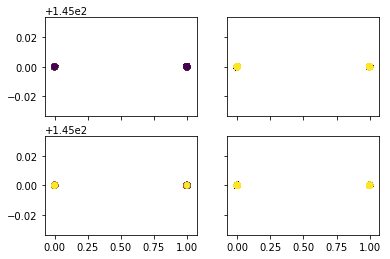

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[24:03:27<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 266f97c1-2eb9-4b87-8b40-158d5c83b7bc



          
  0% |          |[24:03:27<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 266f97c1-2eb9-4b87-8b40-158d5c83b7bc



          
  0% |          |[24:03:27<?]  ?% /s] 
100% |██████████|[00:00<00:00]  100.46% /s] 
          
  0% |          |[24:03:27<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (266f97c1-2eb9-4b87-8b40-158d5c83b7bc) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -8.05469054583 ; MSE : 920.454409489
CrowdAI.Event.Job.COMPLETE : 266f97c1-2eb9-4b87-8b40-158d5c83b7bc	   🍺 


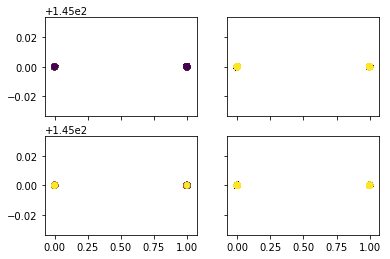

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[24:03:33<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : bb41b800-87c3-4a0a-9a0e-49271a4e721f



          
  0% |          |[24:03:34<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : bb41b800-87c3-4a0a-9a0e-49271a4e721f



          
  0% |          |[24:03:34<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.61% /s] 
          
  0% |          |[24:03:34<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (bb41b800-87c3-4a0a-9a0e-49271a4e721f) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -8.05469054583 ; MSE : 920.454409489
CrowdAI.Event.Job.COMPLETE : bb41b800-87c3-4a0a-9a0e-49271a4e721f	   🍺 


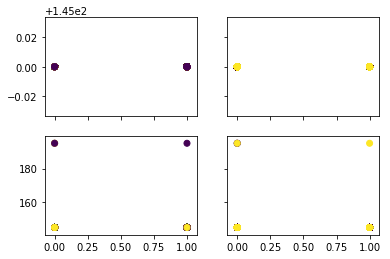

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[24:03:39<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 32919f21-8cb6-45bb-b1dc-83cf0d585cf3



          
  0% |          |[24:03:39<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 32919f21-8cb6-45bb-b1dc-83cf0d585cf3



          
  0% |          |[24:03:39<?]  ?% /s] 
100% |██████████|[00:01<00:00]  93.22% /s] 
          
  0% |          |[24:03:39<?]  ?% /s]  /s] 


CrowdAI.Event.Job.INFO : (32919f21-8cb6-45bb-b1dc-83cf0d585cf3) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -8.05469054583 ; MSE : 920.454409489
CrowdAI.Event.Job.COMPLETE : 32919f21-8cb6-45bb-b1dc-83cf0d585cf3	   🍺 


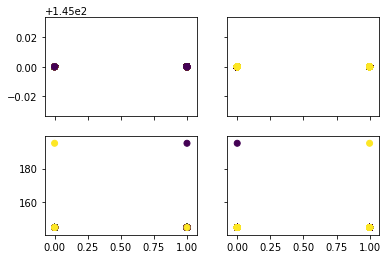

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[24:03:43<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 6105228f-5ad8-4bf9-a0e5-1ba01ba00ccd



          
  0% |          |[24:03:43<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 6105228f-5ad8-4bf9-a0e5-1ba01ba00ccd



          
  0% |          |[24:03:44<?]  ?% /s] 
100% |██████████|[00:01<00:00]  84.13% /s] 
          
  0% |          |[24:03:44<?]  ?% /s]  /s] 


CrowdAI.Event.Job.INFO : (6105228f-5ad8-4bf9-a0e5-1ba01ba00ccd) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -8.05469054583 ; MSE : 920.454409489
CrowdAI.Event.Job.COMPLETE : 6105228f-5ad8-4bf9-a0e5-1ba01ba00ccd	   🍺 


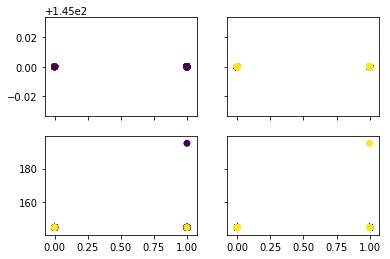

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[24:03:47<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : d90f2f14-0b96-4dda-9311-d79faedd0d21


          
  0% |          |[24:03:48<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : d90f2f14-0b96-4dda-9311-d79faedd0d21


          
  0% |          |[24:03:48<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  105.27% /s] 
  0% |          |[24:03:48<?]  ?% /s] 
100% |██████████|[00:00<00:00]  105.27% /s] 


CrowdAI.Event.Job.INFO : (d90f2f14-0b96-4dda-9311-d79faedd0d21) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -8.05469054583 ; MSE : 920.454409489
CrowdAI.Event.Job.COMPLETE : d90f2f14-0b96-4dda-9311-d79faedd0d21	   🍺 


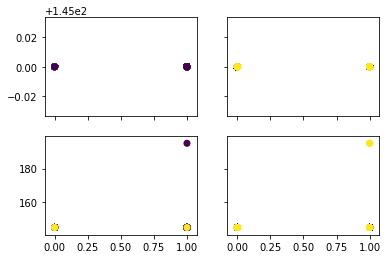

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[24:03:51<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 1939cc9d-20b6-432e-9f7a-4edcd550933c


          
  0% |          |[24:03:52<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 1939cc9d-20b6-432e-9f7a-4edcd550933c


          
  0% |          |[24:03:52<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  104.92% /s] 
  0% |          |[24:03:52<?]  ?% /s] 
100% |██████████|[00:00<00:00]  104.92% /s] 


CrowdAI.Event.Job.INFO : (1939cc9d-20b6-432e-9f7a-4edcd550933c) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -8.05469054583 ; MSE : 920.454409489
CrowdAI.Event.Job.COMPLETE : 1939cc9d-20b6-432e-9f7a-4edcd550933c	   🍺 


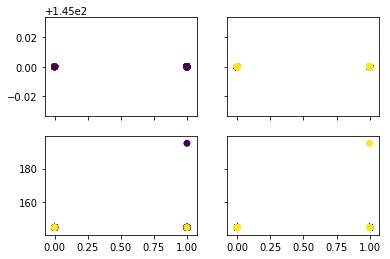

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[24:03:55<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 3e195e47-f7e2-4578-9e6f-fab791c1b872


          
  0% |          |[24:03:56<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 3e195e47-f7e2-4578-9e6f-fab791c1b872


          
  0% |          |[24:03:56<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  106.73% /s] 
  0% |          |[24:03:56<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.73% /s] 


CrowdAI.Event.Job.INFO : (3e195e47-f7e2-4578-9e6f-fab791c1b872) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -8.05469054583 ; MSE : 920.454409489
CrowdAI.Event.Job.COMPLETE : 3e195e47-f7e2-4578-9e6f-fab791c1b872	   🍺 


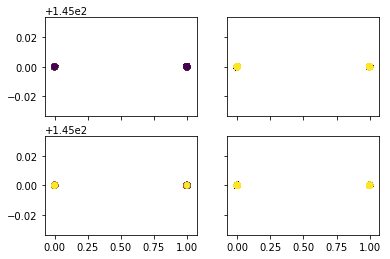

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[24:03:59<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 7c3684f6-ba3a-475d-afbf-d1b286156b47


          
  0% |          |[24:04:00<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 7c3684f6-ba3a-475d-afbf-d1b286156b47


          
  0% |          |[24:04:00<?]  ?% /s] 
  0% |          |[00:01<?]  ?% /s] 
          ██████|[00:01<00:00]  91.50% /s] 
  0% |          |[24:04:00<?]  ?% /s] 
100% |██████████|[00:01<00:00]  91.50% /s] 


CrowdAI.Event.Job.INFO : (7c3684f6-ba3a-475d-afbf-d1b286156b47) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -8.05469054583 ; MSE : 920.454409489
CrowdAI.Event.Job.COMPLETE : 7c3684f6-ba3a-475d-afbf-d1b286156b47	   🍺 


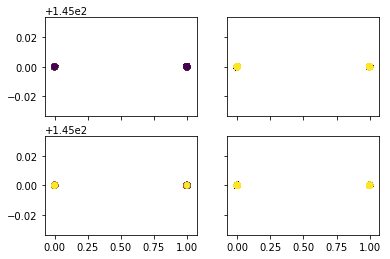

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[24:04:04<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : d84ff48b-0ad7-44e7-a09c-2e97bd0a3c59


          
  0% |          |[24:04:04<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : d84ff48b-0ad7-44e7-a09c-2e97bd0a3c59


          
  0% |          |[24:04:04<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  101.22% /s] 
  0% |          |[24:04:04<?]  ?% /s] 
100% |██████████|[00:00<00:00]  101.22% /s] 


CrowdAI.Event.Job.INFO : (d84ff48b-0ad7-44e7-a09c-2e97bd0a3c59) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -8.05469054583 ; MSE : 920.454409489
CrowdAI.Event.Job.COMPLETE : d84ff48b-0ad7-44e7-a09c-2e97bd0a3c59	   🍺 


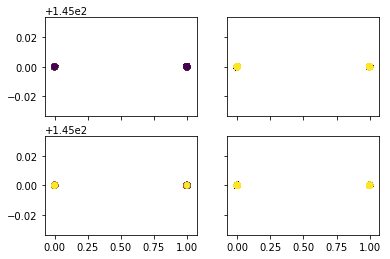

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[24:04:08<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 6d400d82-5a02-4e24-a067-3a86f072a3a9



          
  0% |          |[24:04:08<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 6d400d82-5a02-4e24-a067-3a86f072a3a9



          
  0% |          |[24:04:08<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.75% /s] 
          
  0% |          |[24:04:08<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (6d400d82-5a02-4e24-a067-3a86f072a3a9) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -8.05469054583 ; MSE : 920.454409489
CrowdAI.Event.Job.COMPLETE : 6d400d82-5a02-4e24-a067-3a86f072a3a9	   🍺 


In [311]:
lg_all = topsnp_model(m=linear_model.LinearRegression(),X=X,y=yb,df_test=df_test,val_idx=val_idx)

## 1.2 Residual Linear Model (remove gender and nationality)

### 1.2.a Linear model (gender and nationality) as a base model

In [148]:
#Load training data
x_train = X[['gender','nationality']]
y_train = y
x_test = df_test[['gender','nationality']]

# Instantiate a linear model
gender_nation_ml = linear_model.LinearRegression()
gender_nation_ml.fit(x_train, y_train)

# Predict the heights for the test set
heights = gender_nation_ml.predict(x_test)
#Convert heights from np.array to a list (to ensure it is JSON serializable)
heights = heights.tolist()

# Create the challenge object by authentication with crowdAI with your API_KEY
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
challenge.submit(heights)
challenge.disconnect()

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[2:08:00<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : 9183665f-d097-4bb0-a455-696718fe7b0a



          
  0% |          |[2:08:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 9183665f-d097-4bb0-a455-696718fe7b0a



          
  0% |          |[2:08:00<?]  ?% /s] A
100% |██████████|[00:01<00:00]  98.79% /s] 
          
  0% |          |[2:08:00<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (9183665f-d097-4bb0-a455-696718fe7b0a) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.418981198924 ; MSE : 59.0634560883
CrowdAI.Event.Job.COMPLETE : 9183665f-d097-4bb0-a455-696718fe7b0a	   🍺 


(array([   8.,   28.,  137.,  511., 1051., 1053.,  574.,  147.,   19.,    2.]),
 array([-25.33765, -20.31765, -15.29765, -10.27765,  -5.25765,  -0.23765,   4.78235,   9.80235,  14.82235,
         19.84235,  24.86235]),
 <a list of 10 Patch objects>)

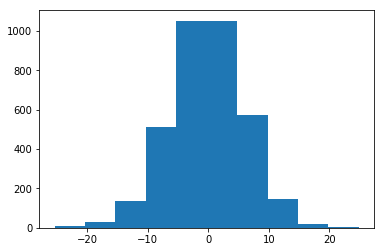

In [149]:
plt.hist(y_train-gender_nation_ml.predict(x_train))

In [150]:
base=gender_nation_ml.intercept_+np.dot(x_train,gender_nation_ml.coef_)

In [152]:
y_residual=y_train-gender_nation_ml.predict(x_train)

### 1.2.b1 linear regression for residual model

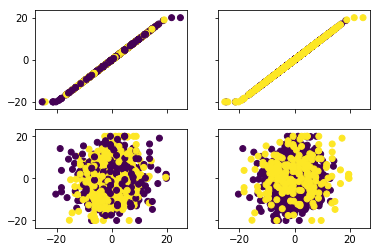

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[2:20:17<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : d5457ea0-61f1-4927-9bca-399b6d01e0ad


          
  0% |          |[2:20:17<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : d5457ea0-61f1-4927-9bca-399b6d01e0ad


          
  0% |          |[2:20:17<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  101.99% /s] 
  0% |          |[2:20:17<?]  ?% /s] 
100% |██████████|[00:00<00:00]  101.99% /s] 


CrowdAI.Event.Job.INFO : (d5457ea0-61f1-4927-9bca-399b6d01e0ad) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.268928556036 ; MSE : 128.992910229
CrowdAI.Event.Job.COMPLETE : d5457ea0-61f1-4927-9bca-399b6d01e0ad	   🍺 


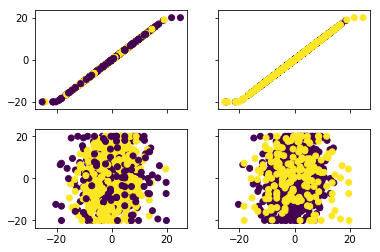

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[2:20:24<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 447db548-22eb-4956-be0e-495e9d6d52ac


          
  0% |          |[2:20:24<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 447db548-22eb-4956-be0e-495e9d6d52ac


          
  0% |          |[2:20:24<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  105.51% /s] 
  0% |          |[2:20:24<?]  ?% /s] 
100% |██████████|[00:00<00:00]  105.51% /s] 


CrowdAI.Event.Job.INFO : (447db548-22eb-4956-be0e-495e9d6d52ac) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.590623111927 ; MSE : 161.694764697
CrowdAI.Event.Job.COMPLETE : 447db548-22eb-4956-be0e-495e9d6d52ac	   🍺 


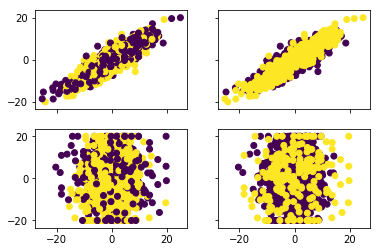

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[2:20:29<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 0169a7c9-2cea-4046-acd4-2dbb723247c9


          
  0% |          |[2:20:29<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 0169a7c9-2cea-4046-acd4-2dbb723247c9


          
  0% |          |[2:20:30<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  105.82% /s] 
  0% |          |[2:20:30<?]  ?% /s] 
100% |██████████|[00:00<00:00]  105.82% /s] 


CrowdAI.Event.Job.INFO : (0169a7c9-2cea-4046-acd4-2dbb723247c9) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.879956881919 ; MSE : 191.106984038
CrowdAI.Event.Job.COMPLETE : 0169a7c9-2cea-4046-acd4-2dbb723247c9	   🍺 


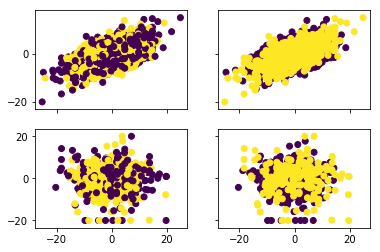

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[2:20:33<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 45b060f6-4da8-4596-9272-3386b6613c0d


          
  0% |          |[2:20:33<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 45b060f6-4da8-4596-9272-3386b6613c0d


          
  0% |          |[2:20:34<?]  ?% /s] 
  0% |          |[00:01<?]  ?% /s] 
          ██████|[00:01<00:00]  98.08% /s] 
  0% |          |[2:20:34<?]  ?% /s] 
100% |██████████|[00:01<00:00]  98.08% /s] 


CrowdAI.Event.Job.INFO : (45b060f6-4da8-4596-9272-3386b6613c0d) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.066963522739 ; MSE : 94.8478068204
CrowdAI.Event.Job.COMPLETE : 45b060f6-4da8-4596-9272-3386b6613c0d	   🍺 


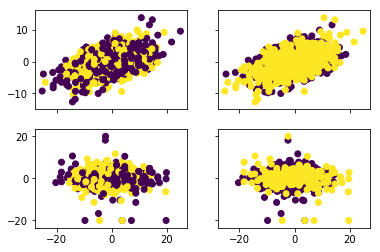

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[2:20:37<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : b861e861-3c22-41fa-8aec-a9f1a00676fa


          
  0% |          |[2:20:38<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : b861e861-3c22-41fa-8aec-a9f1a00676fa


          
  0% |          |[2:20:38<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  106.33% /s] 
  0% |          |[2:20:38<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.33% /s] 


CrowdAI.Event.Job.INFO : (b861e861-3c22-41fa-8aec-a9f1a00676fa) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.158114420973 ; MSE : 85.5818638504
CrowdAI.Event.Job.COMPLETE : b861e861-3c22-41fa-8aec-a9f1a00676fa	   🍺 


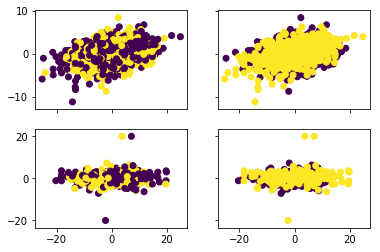

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[2:20:41<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 7f585990-677e-439d-a2e4-b12e5ff68370


          
  0% |          |[2:20:42<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 7f585990-677e-439d-a2e4-b12e5ff68370


          
  0% |          |[2:20:42<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  100.35% /s] 
  0% |          |[2:20:42<?]  ?% /s] 
100% |██████████|[00:00<00:00]  100.35% /s] 


CrowdAI.Event.Job.INFO : (7f585990-677e-439d-a2e4-b12e5ff68370) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.346877978705 ; MSE : 66.3931076819
CrowdAI.Event.Job.COMPLETE : 7f585990-677e-439d-a2e4-b12e5ff68370	   🍺 


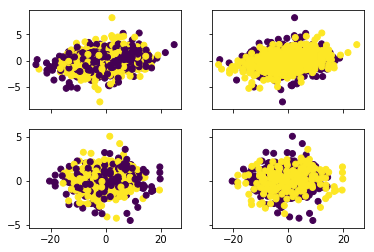

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[2:20:45<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 251c09b3-3274-42e0-9deb-5576a390e326


          
  0% |          |[2:20:45<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 251c09b3-3274-42e0-9deb-5576a390e326


          
  0% |          |[2:20:46<?]  ?% /s] 
  0% |          |[00:01<?]  ?% /s] 
          ██████|[00:01<00:00]  84.37% /s] 
  0% |          |[2:20:46<?]  ?% /s] 
100% |██████████|[00:01<00:00]  84.37% /s] 


CrowdAI.Event.Job.INFO : (251c09b3-3274-42e0-9deb-5576a390e326) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.389280784083 ; MSE : 62.0826512409
CrowdAI.Event.Job.COMPLETE : 251c09b3-3274-42e0-9deb-5576a390e326	   🍺 


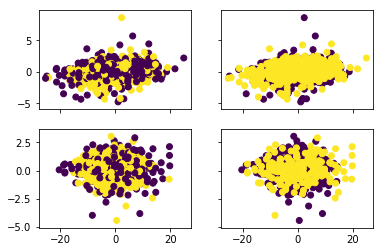

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[2:20:50<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : 657e53a7-73bf-4e32-b46d-f664fde0d947



          
  0% |          |[2:20:51<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 657e53a7-73bf-4e32-b46d-f664fde0d947



          
  0% |          |[2:20:51<?]  ?% /s] A
100% |██████████|[00:01<00:00]  95.07% /s] 
          
  0% |          |[2:20:51<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (657e53a7-73bf-4e32-b46d-f664fde0d947) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.392624381577 ; MSE : 61.7427578959
CrowdAI.Event.Job.COMPLETE : 657e53a7-73bf-4e32-b46d-f664fde0d947	   🍺 


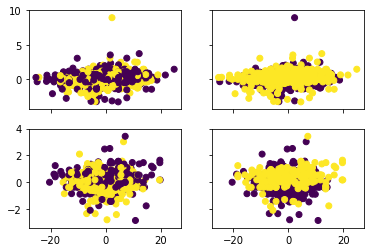

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[2:20:54<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : 7a3088cd-0d22-43f8-acfa-b390b323ca16



          
  0% |          |[2:20:55<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 7a3088cd-0d22-43f8-acfa-b390b323ca16



          
  0% |          |[2:20:55<?]  ?% /s] A
100% |██████████|[00:00<00:00]  107.27% /s] 
          
  0% |          |[2:20:55<?]  ?% /s] 7% /s] 


CrowdAI.Event.Job.INFO : (7a3088cd-0d22-43f8-acfa-b390b323ca16) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.406541112001 ; MSE : 60.3280529074
CrowdAI.Event.Job.COMPLETE : 7a3088cd-0d22-43f8-acfa-b390b323ca16	   🍺 


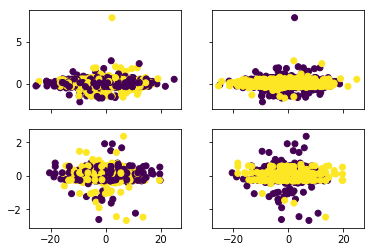

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[2:20:59<?]  ?% /s] A

CrowdAI.Event.Job.ENQUEUED : 4e3884d3-91e0-424c-b131-7fbe75407c42



          
  0% |          |[2:21:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 4e3884d3-91e0-424c-b131-7fbe75407c42



          
  0% |          |[2:21:00<?]  ?% /s] A
100% |██████████|[00:00<00:00]  108.89% /s] 
          
  0% |          |[2:21:00<?]  ?% /s] 9% /s] 

CrowdAI.Event.Job.INFO : (4e3884d3-91e0-424c-b131-7fbe75407c42) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.415742613754 ; MSE : 59.3926744073
CrowdAI.Event.Job.COMPLETE : 4e3884d3-91e0-424c-b131-7fbe75407c42	   🍺 


In [154]:
score_list={}
submit={}
for n in [7726, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10]:
    var_idx = list(range(n))
    gn_idx = list([7726,7727])
    ((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, X.iloc[:,var_idx].values, np.array(y_residual))
    ((val_gn,trn_gn), (y_val_gn,y_trn_gn)) = split_by_idx(val_idx, X.iloc[:,gn_idx].values, np.array(y_residual))
    x_test = df_test.iloc[:,var_idx].values
    x_test_gn = df_test.iloc[:,gn_idx].values
    # Instantiate a linear model
    regr = linear_model.LinearRegression()
    regr.fit(trn, y_trn)
    

    preds = np.clip(regr.predict(trn),-20,20)
    preds1 = np.clip(regr.predict(val),-20,20)

    score_list[n]=(regr.score(trn, y_trn), regr.score(val, y_val))

    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
    ax1.scatter(y_trn,preds,c=trn_gn[:,-2], marker='o')
    ax2.scatter(y_trn,preds,c=trn_gn[:,-1], marker='o')
    ax3.scatter(y_val,preds1,c=val_gn[:,-2], marker='o')
    ax4.scatter(y_val,preds1,c=val_gn[:,-1], marker='o')
    plt.show()

    base=gender_nation_ml.intercept_+np.dot(x_test_gn,gender_nation_ml.coef_)
    heights = (base+np.clip(regr.predict(x_test),-20,20)).tolist()
    # Create the challenge object by authentication with crowdAI with your API_KEY
    challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
    submit[n]=challenge.submit(heights)
    challenge.disconnect()


In [316]:
score_list_rrf

{7726: (0.8323830063401586, -0.03580380799365512, -0.0719091894060131),
 5000: (0.8306115504620315, -0.01894609328577035, -0.07051815002558603),
 2000: (0.8275765256070614, -0.0018412490768182632, -0.074408446703353),
 1000: (0.8243316808428592, -0.013937062449612903, -0.06871446095342337),
 500: (0.8146336195626966, -0.012500756893237153, -0.0701556798209706),
 200: (0.8047453958038326, -0.036849920378689394, -0.05637969049888314),
 100: (0.7683219356575179, -0.06835680165589797, -0.08602250826888813),
 50: (0.6469317669366222, -0.10547686778491139, -0.10455093451913999),
 20: (0.10687654425305992, -0.03869544028626826, -0.03819873262384932),
 10: (0.030966929612809998, -0.03148632457622047, -0.02556524654641179)}

### 1.2.b2 random forest for residual model

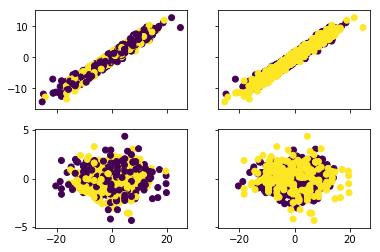

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[17:10:58<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 63ed9574-49ed-4ba3-abb5-20cbcd822611



          
  0% |          |[17:10:59<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 63ed9574-49ed-4ba3-abb5-20cbcd822611



          
  0% |          |[17:10:59<?]  ?% /s] 
100% |██████████|[00:00<00:00]  105.34% /s] 
          
  0% |          |[17:10:59<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (63ed9574-49ed-4ba3-abb5-20cbcd822611) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.39025612194 ; MSE : 61.983503288
CrowdAI.Event.Job.COMPLETE : 63ed9574-49ed-4ba3-abb5-20cbcd822611	   🍺 


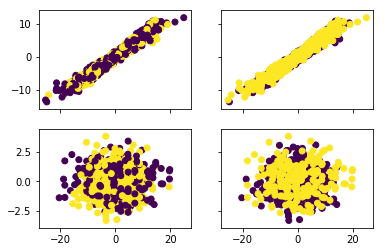

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[17:11:08<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 1dba8c7b-40d7-47f8-bf0e-259362f4b708



          
  0% |          |[17:11:09<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 1dba8c7b-40d7-47f8-bf0e-259362f4b708



          
  0% |          |[17:11:09<?]  ?% /s] 
100% |██████████|[00:00<00:00]  104.62% /s] 
          
  0% |          |[17:11:09<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (1dba8c7b-40d7-47f8-bf0e-259362f4b708) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.419428823563 ; MSE : 59.0179528134
CrowdAI.Event.Job.COMPLETE : 1dba8c7b-40d7-47f8-bf0e-259362f4b708	   🍺 


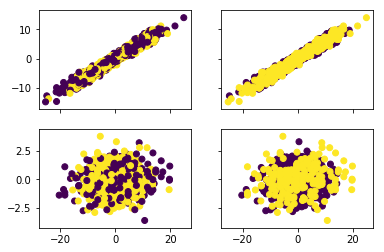

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[17:11:15<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : dde6c6fe-c973-490e-9617-2d7a860bc17b



          
  0% |          |[17:11:15<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : dde6c6fe-c973-490e-9617-2d7a860bc17b



          
  0% |          |[17:11:16<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.90% /s] 
          
  0% |          |[17:11:16<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (dde6c6fe-c973-490e-9617-2d7a860bc17b) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.396472021652 ; MSE : 61.3516261112
CrowdAI.Event.Job.COMPLETE : dde6c6fe-c973-490e-9617-2d7a860bc17b	   🍺 


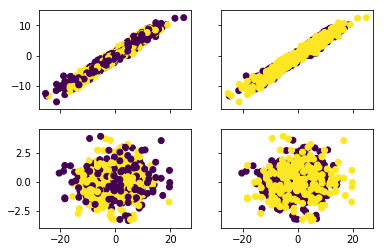

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[17:11:21<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 0bb3ccc2-3ef5-4eeb-9654-7af8d5d5df78



          
  0% |          |[17:11:21<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 0bb3ccc2-3ef5-4eeb-9654-7af8d5d5df78



          
  0% |          |[17:11:22<?]  ?% /s] 
100% |██████████|[00:00<00:00]  105.99% /s] 
          
  0% |          |[17:11:22<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (0bb3ccc2-3ef5-4eeb-9654-7af8d5d5df78) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.396145387926 ; MSE : 61.3848300569
CrowdAI.Event.Job.COMPLETE : 0bb3ccc2-3ef5-4eeb-9654-7af8d5d5df78	   🍺 


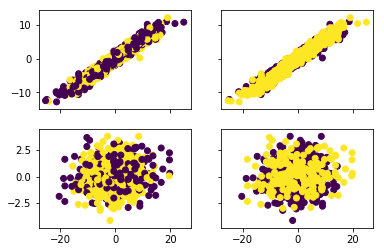

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[17:11:26<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 1b734f04-b9c1-420e-bd59-92b777105b3e



          
  0% |          |[17:11:26<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 1b734f04-b9c1-420e-bd59-92b777105b3e



          
  0% |          |[17:11:27<?]  ?% /s] 
100% |██████████|[00:00<00:00]  105.19% /s] 
          
  0% |          |[17:11:27<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (1b734f04-b9c1-420e-bd59-92b777105b3e) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.410069884604 ; MSE : 59.9693355901
CrowdAI.Event.Job.COMPLETE : 1b734f04-b9c1-420e-bd59-92b777105b3e	   🍺 


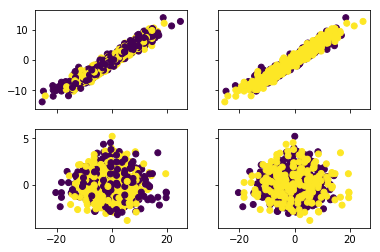

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[17:11:31<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : dee4047d-d6b6-41e7-8397-d18e9016ed03



          
  0% |          |[17:11:31<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : dee4047d-d6b6-41e7-8397-d18e9016ed03



          
  0% |          |[17:11:32<?]  ?% /s] 
100% |██████████|[00:00<00:00]  108.79% /s] 
          
  0% |          |[17:11:32<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (dee4047d-d6b6-41e7-8397-d18e9016ed03) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.375667281459 ; MSE : 63.4665316126
CrowdAI.Event.Job.COMPLETE : dee4047d-d6b6-41e7-8397-d18e9016ed03	   🍺 


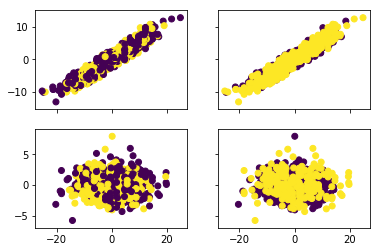

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[17:11:36<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 415072ca-6a6d-4365-bcea-26907b11c8c6



          
  0% |          |[17:11:36<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 415072ca-6a6d-4365-bcea-26907b11c8c6



          
  0% |          |[17:11:37<?]  ?% /s] 
100% |██████████|[00:00<00:00]  108.00% /s] 
          
  0% |          |[17:11:37<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (415072ca-6a6d-4365-bcea-26907b11c8c6) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.392985012225 ; MSE : 61.7060979937
CrowdAI.Event.Job.COMPLETE : 415072ca-6a6d-4365-bcea-26907b11c8c6	   🍺 


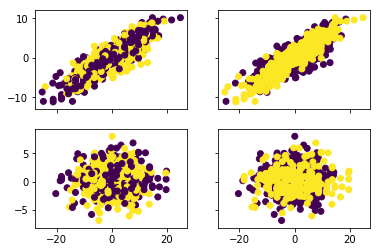

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[17:11:41<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : ea1f5224-5b8c-4374-af32-d9901df8aa32



          
  0% |          |[17:11:41<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : ea1f5224-5b8c-4374-af32-d9901df8aa32



          
  0% |          |[17:11:41<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.57% /s] 
          
  0% |          |[17:11:41<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (ea1f5224-5b8c-4374-af32-d9901df8aa32) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.355683568594 ; MSE : 65.4979755954
CrowdAI.Event.Job.COMPLETE : ea1f5224-5b8c-4374-af32-d9901df8aa32	   🍺 


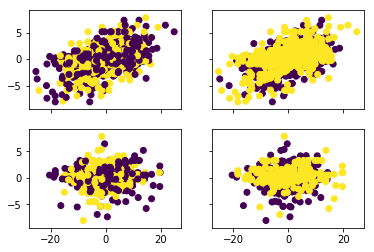

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[17:11:45<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 2f845047-344e-4f05-bba1-cea636322f95



          
  0% |          |[17:11:46<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 2f845047-344e-4f05-bba1-cea636322f95



          
  0% |          |[17:11:46<?]  ?% /s] 
100% |██████████|[00:00<00:00]  110.32% /s] 
          
  0% |          |[17:11:46<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (2f845047-344e-4f05-bba1-cea636322f95) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.41020617162 ; MSE : 59.9554813358
CrowdAI.Event.Job.COMPLETE : 2f845047-344e-4f05-bba1-cea636322f95	   🍺 


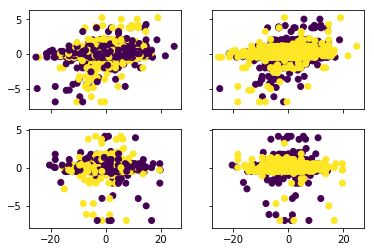

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[17:11:50<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 5df146d2-06bb-41c1-a0d4-65128c01c273


          
  0% |          |[17:11:50<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 5df146d2-06bb-41c1-a0d4-65128c01c273


          
  0% |          |[17:11:51<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  107.47% /s] 
  0% |          |[17:11:51<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.47% /s] 


CrowdAI.Event.Job.INFO : (5df146d2-06bb-41c1-a0d4-65128c01c273) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.422013413678 ; MSE : 58.7552163504
CrowdAI.Event.Job.COMPLETE : 5df146d2-06bb-41c1-a0d4-65128c01c273	   🍺 


In [161]:
score_list_rrf={}
submit_rrf={}
for n in [7726, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10]:
    var_idx = list(range(n))
    gn_idx = list([7726,7727])
    ((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, X.iloc[:,var_idx].values, np.array(y_residual))
    ((val_gn,trn_gn), (y_val_gn,y_trn_gn)) = split_by_idx(val_idx, X.iloc[:,gn_idx].values, np.array(y_residual))
    x_test = df_test.iloc[:,var_idx].values
    x_test_gn = df_test.iloc[:,gn_idx].values
    
    r_rf = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                                n_jobs=-1, oob_score=True)
    r_rf.fit(trn, y_trn)
    

    preds = np.clip(r_rf.predict(trn),-20,20)
    preds1 = np.clip(r_rf.predict(val),-20,20)

    score_list_rrf[n]=(r_rf.score(trn, y_trn), r_rf.score(val, y_val),r_rf.oob_score_)

    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
    ax1.scatter(y_trn,preds,c=trn_gn[:,-2], marker='o')
    ax2.scatter(y_trn,preds,c=trn_gn[:,-1], marker='o')
    ax3.scatter(y_val,preds1,c=val_gn[:,-2], marker='o')
    ax4.scatter(y_val,preds1,c=val_gn[:,-1], marker='o')
    plt.show()

    base=gender_nation_ml.intercept_+np.dot(x_test_gn,gender_nation_ml.coef_)
    heights = (base+np.clip(r_rf.predict(x_test),-20,20)).tolist()
    # Create the challenge object by authentication with crowdAI with your API_KEY
    challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
    submit_rrf[n]=challenge.submit(heights)
    challenge.disconnect()


In [162]:
score_list_rrf

{7726: (0.8323830063401586, -0.03580380799365512, -0.0719091894060131),
 5000: (0.8306115504620315, -0.01894609328577035, -0.07051815002558603),
 2000: (0.8275765256070614, -0.0018412490768182632, -0.074408446703353),
 1000: (0.8243316808428592, -0.013937062449612903, -0.06871446095342337),
 500: (0.8146336195626966, -0.012500756893237153, -0.0701556798209706),
 200: (0.8047453958038326, -0.036849920378689394, -0.05637969049888314),
 100: (0.7683219356575179, -0.06835680165589797, -0.08602250826888813),
 50: (0.6469317669366222, -0.10547686778491139, -0.10455093451913999),
 20: (0.10687654425305992, -0.03869544028626826, -0.03819873262384932),
 10: (0.030966929612809998, -0.03148632457622047, -0.02556524654641179)}

# 2. OS DATA

In [309]:
def topsnp_model(m,X,y,df_test,val_idx,residual=False,topn=[7726, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10]):
    score_list={}
    submit={}
    for n in topn:
        if residual:
            var_idx = list(range(n))
            ((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, X.iloc[:,var_idx].values, np.array(y))
            x_test = df_test.iloc[:,var_idx].values
            gn_idx = list([7726,7727])
            ((val_gn,trn_gn), (y_val_gn,y_trn_gn)) = split_by_idx(val_idx, X.iloc[:,gn_idx].values, np.array(y))
            x_test_gn = df_test.iloc[:,gn_idx].values
        else:
            var_idx = list(range(n))+list([7726,7727])
            ((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, X.iloc[:,var_idx].values, np.array(y))
            x_test = df_test.iloc[:,var_idx].values

        ml = m
        ml.fit(trn, y_trn)
        
        if residual:
            preds = np.clip(ml.predict(trn),-20,20)
            preds1 = np.clip(ml.predict(val),-20,20)
            f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
            ax1.scatter(y_trn,preds,c=trn_gn[:,-2], marker='o')
            ax2.scatter(y_trn,preds,c=trn_gn[:,-1], marker='o')
            ax3.scatter(y_val,preds1,c=val_gn[:,-2], marker='o')
            ax4.scatter(y_val,preds1,c=val_gn[:,-1], marker='o')
            plt.show()
            base=gender_nation_ml.intercept_+np.dot(x_test_gn,gender_nation_ml.coef_)
            heights = (base+np.clip(ml.predict(x_test),-20,20)).tolist()
        else:
            preds = np.clip(ml.predict(trn),145,195)
            preds1 = np.clip(ml.predict(val),145,195)
            f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
            ax1.scatter(y_trn,preds,c=trn[:,-2], marker='o')
            ax2.scatter(y_trn,preds,c=trn[:,-1], marker='o')
            ax3.scatter(y_val,preds1,c=val[:,-2], marker='o')
            ax4.scatter(y_val,preds1,c=val[:,-1], marker='o')
            plt.show()
            heights = np.clip(ml.predict(x_test),145,195).tolist()
        
        score_list[n]=(ml.score(trn, y_trn), ml.score(val, y_val))
        # Create the challenge object by authentication with crowdAI with your API_KEY
        challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
        submit[n]=challenge.submit(heights)
        challenge.disconnect()
    return (score_list,submit)

## 2.1 Linear model with os data

### Sample seperation of os data

783 626


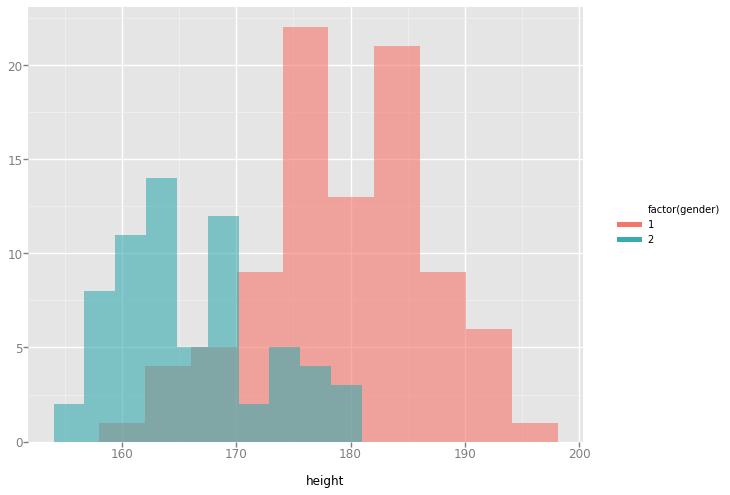

<ggplot: (-9223363276567660200)>

In [167]:
os_meta = all_meta.iloc[2747:3530,]
samp_size=len(os_meta)
train_ratio = 0.8
train_size = int(samp_size * train_ratio)

import random
os_val_idx = random.sample(range(samp_size), samp_size-train_size)
print(samp_size,train_size)
ggplot( aes(x='height',fill='factor(gender)'),data=os_meta.iloc[os_val_idx,]) +\
    geom_histogram(alpha=0.6)

### 2.1.1 Linear Model with os data by top 10000, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10 snps

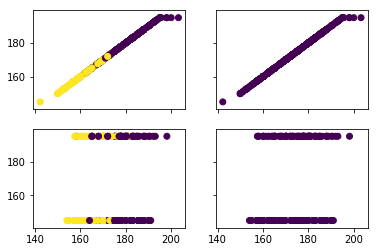

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:10:34<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 63666d28-522f-4c1b-9840-480cc0dda7c8



          
  0% |          |[18:10:34<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 63666d28-522f-4c1b-9840-480cc0dda7c8



          
  0% |          |[18:10:35<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.60% /s] 
          
  0% |          |[18:10:35<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (63666d28-522f-4c1b-9840-480cc0dda7c8) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -6.73966565718 ; MSE : 786.775577372
CrowdAI.Event.Job.COMPLETE : 63666d28-522f-4c1b-9840-480cc0dda7c8	   🍺 


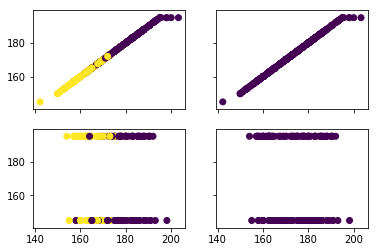

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:10:38<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : e7422756-ccc2-4d87-a4ce-6cc33073cb8b



          
  0% |          |[18:10:38<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : e7422756-ccc2-4d87-a4ce-6cc33073cb8b



          
  0% |          |[18:10:39<?]  ?% /s] 
100% |██████████|[00:01<00:00]  97.90% /s] 
          
  0% |          |[18:10:39<?]  ?% /s]  /s] 


CrowdAI.Event.Job.INFO : (e7422756-ccc2-4d87-a4ce-6cc33073cb8b) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -5.40934644171 ; MSE : 651.54200073
CrowdAI.Event.Job.COMPLETE : e7422756-ccc2-4d87-a4ce-6cc33073cb8b	   🍺 


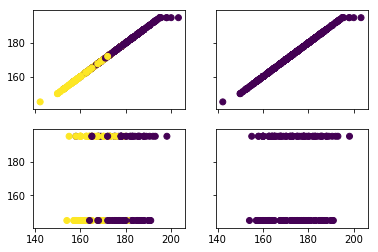

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:10:42<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 5125dcbc-66f8-438c-b22c-68dcec4e90a5



          
  0% |          |[18:10:42<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 5125dcbc-66f8-438c-b22c-68dcec4e90a5



          
  0% |          |[18:10:42<?]  ?% /s] 
100% |██████████|[00:00<00:00]  101.10% /s] 
          
  0% |          |[18:10:42<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (5125dcbc-66f8-438c-b22c-68dcec4e90a5) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -6.17636052168 ; MSE : 729.51280365
CrowdAI.Event.Job.COMPLETE : 5125dcbc-66f8-438c-b22c-68dcec4e90a5	   🍺 


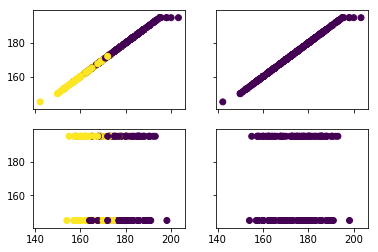

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:10:46<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : b3f8eb39-9ba4-443a-aad2-87646ea3b50b



          
  0% |          |[18:10:46<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : b3f8eb39-9ba4-443a-aad2-87646ea3b50b



          
  0% |          |[18:10:46<?]  ?% /s] 
100% |██████████|[00:00<00:00]  108.44% /s] 
          
  0% |          |[18:10:46<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (b3f8eb39-9ba4-443a-aad2-87646ea3b50b) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -5.90091903032 ; MSE : 701.51280365
CrowdAI.Event.Job.COMPLETE : b3f8eb39-9ba4-443a-aad2-87646ea3b50b	   🍺 


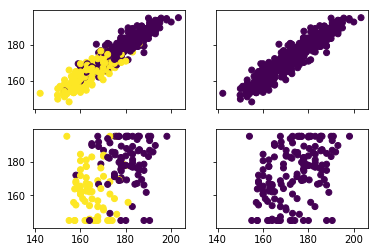

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:10:49<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : d3826e94-4e69-4461-9ae0-d072afa18cfe



          
  0% |          |[18:10:50<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : d3826e94-4e69-4461-9ae0-d072afa18cfe



          
  0% |          |[18:10:50<?]  ?% /s] 
100% |██████████|[00:00<00:00]  105.36% /s] 
          
  0% |          |[18:10:50<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (d3826e94-4e69-4461-9ae0-d072afa18cfe) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -1.13575906178 ; MSE : 217.11055017
CrowdAI.Event.Job.COMPLETE : d3826e94-4e69-4461-9ae0-d072afa18cfe	   🍺 


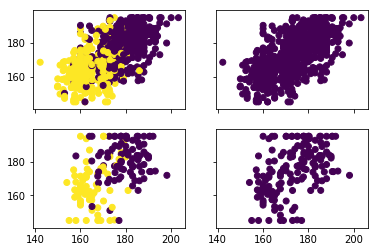

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:10:53<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 24da3bcd-d491-4875-a2e2-c497e96e257f



          
  0% |          |[18:10:53<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 24da3bcd-d491-4875-a2e2-c497e96e257f



          
  0% |          |[18:10:54<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.54% /s] 
          
  0% |          |[18:10:54<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (24da3bcd-d491-4875-a2e2-c497e96e257f) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -1.00868740152 ; MSE : 204.193082763
CrowdAI.Event.Job.COMPLETE : 24da3bcd-d491-4875-a2e2-c497e96e257f	   🍺 


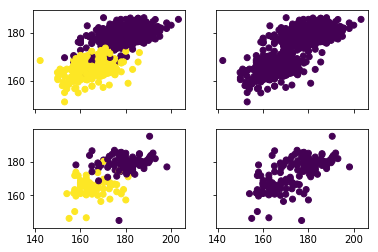

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:10:57<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 00ba4e21-38e2-4aa8-a1fe-b42c8ea6c251



          
  0% |          |[18:10:57<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 00ba4e21-38e2-4aa8-a1fe-b42c8ea6c251



          
  0% |          |[18:10:57<?]  ?% /s] 
100% |██████████|[00:00<00:00]  105.78% /s] 
          
  0% |          |[18:10:57<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (00ba4e21-38e2-4aa8-a1fe-b42c8ea6c251) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.362962034561 ; MSE : 64.7580832645
CrowdAI.Event.Job.COMPLETE : 00ba4e21-38e2-4aa8-a1fe-b42c8ea6c251	   🍺 


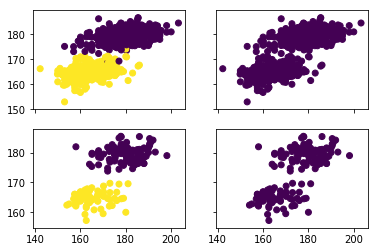

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:11:01<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 268c8880-a0a0-43d3-8fc1-eb7d984e2c49



          
  0% |          |[18:11:01<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 268c8880-a0a0-43d3-8fc1-eb7d984e2c49



          
  0% |          |[18:11:01<?]  ?% /s] 
100% |██████████|[00:00<00:00]  108.29% /s] 
          
  0% |          |[18:11:01<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (268c8880-a0a0-43d3-8fc1-eb7d984e2c49) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.398704599367 ; MSE : 61.1246734626
CrowdAI.Event.Job.COMPLETE : 268c8880-a0a0-43d3-8fc1-eb7d984e2c49	   🍺 


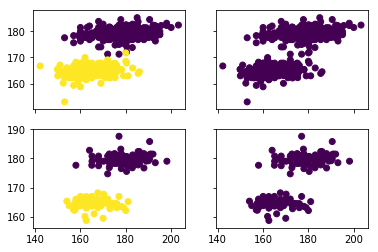

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:11:04<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 96a1cc3c-ab9c-4c61-84ed-15c2382f8346



          
  0% |          |[18:11:05<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 96a1cc3c-ab9c-4c61-84ed-15c2382f8346



          
  0% |          |[18:11:05<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.51% /s] 
          
  0% |          |[18:11:05<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (96a1cc3c-ab9c-4c61-84ed-15c2382f8346) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.401380619812 ; MSE : 60.8526426509
CrowdAI.Event.Job.COMPLETE : 96a1cc3c-ab9c-4c61-84ed-15c2382f8346	   🍺 


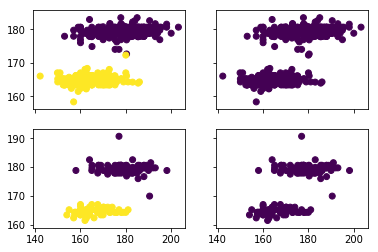

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:11:08<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : ef348ff4-bcba-4dcb-91d9-f766b70e1e14



          
  0% |          |[18:11:08<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : ef348ff4-bcba-4dcb-91d9-f766b70e1e14



          
  0% |          |[18:11:09<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.56% /s] 
          
  0% |          |[18:11:09<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (ef348ff4-bcba-4dcb-91d9-f766b70e1e14) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.419339952596 ; MSE : 59.02698699
CrowdAI.Event.Job.COMPLETE : ef348ff4-bcba-4dcb-91d9-f766b70e1e14	   🍺 


In [171]:
lm_os = topsnp_model(m=linear_model.LinearRegression(),X=X.iloc[2747:3530,],y=y.iloc[2747:3530,],df_test=df_test,val_idx=os_val_idx)

### 2.1.2 Residual Model with os data by top 10000, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10 snps

In [173]:
#Load training data
x_train = X.iloc[2747:3530,]
x_train = x_train[['gender','nationality']]
y_train = y.iloc[2747:3530,]
x_test = df_test[['gender','nationality']]

# Instantiate a linear model
os_gender_nation_ml = linear_model.LinearRegression()
os_gender_nation_ml.fit(x_train, y_train)

# Predict the heights for the test set
heights = os_gender_nation_ml.predict(x_test)
#Convert heights from np.array to a list (to ensure it is JSON serializable)
heights = heights.tolist()

# Create the challenge object by authentication with crowdAI with your API_KEY
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
challenge.submit(heights)
challenge.disconnect()

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:20:38<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 1ec85f5d-c8c3-4a95-8a33-f02570fe6bdc


          
  0% |          |[18:20:38<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 1ec85f5d-c8c3-4a95-8a33-f02570fe6bdc


          
  0% |          |[18:20:38<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  106.31% /s] 
  0% |          |[18:20:38<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.31% /s] 


CrowdAI.Event.Job.INFO : (1ec85f5d-c8c3-4a95-8a33-f02570fe6bdc) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.420750671304 ; MSE : 58.8835804044
CrowdAI.Event.Job.COMPLETE : 1ec85f5d-c8c3-4a95-8a33-f02570fe6bdc	   🍺 


(array([  5.,  12.,  42., 111., 192., 169., 169.,  61.,  18.,   4.]),
 array([-26.41888, -21.39888, -16.37888, -11.35888,  -6.33888,  -1.31888,   3.70112,   8.72112,  13.74112,
         18.76112,  23.78112]),
 <a list of 10 Patch objects>)

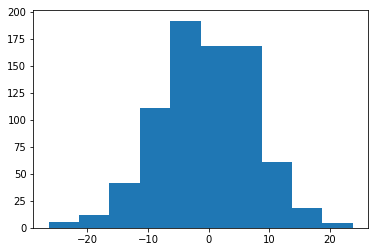

In [174]:
plt.hist(y_train-os_gender_nation_ml.predict(x_train))

In [175]:
y_residual=y_train-os_gender_nation_ml.predict(x_train)

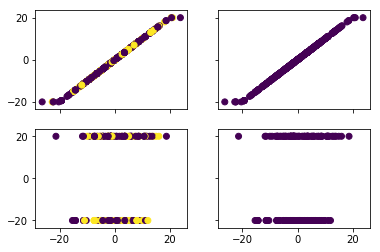

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:25:24<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : a0d6c9bc-9c93-469f-92cd-68b9b76ee56c



          
  0% |          |[18:25:24<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : a0d6c9bc-9c93-469f-92cd-68b9b76ee56c



          
  0% |          |[18:25:24<?]  ?% /s] 
100% |██████████|[00:01<00:00]  94.23% /s] 
          
  0% |          |[18:25:24<?]  ?% /s]  /s] 


CrowdAI.Event.Job.INFO : (a0d6c9bc-9c93-469f-92cd-68b9b76ee56c) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -3.6673113693 ; MSE : 474.455455831
CrowdAI.Event.Job.COMPLETE : a0d6c9bc-9c93-469f-92cd-68b9b76ee56c	   🍺 


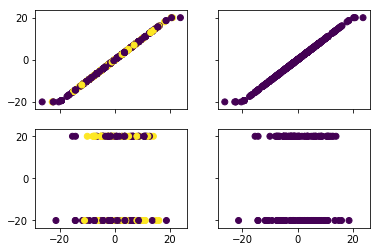

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:25:28<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 9837c8bc-6981-47da-bcf2-39f7d511514c



          
  0% |          |[18:25:28<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 9837c8bc-6981-47da-bcf2-39f7d511514c



          
  0% |          |[18:25:28<?]  ?% /s] 
100% |██████████|[00:00<00:00]  102.65% /s] 
          
  0% |          |[18:25:28<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (9837c8bc-6981-47da-bcf2-39f7d511514c) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -3.11969286575 ; MSE : 418.787306405
CrowdAI.Event.Job.COMPLETE : 9837c8bc-6981-47da-bcf2-39f7d511514c	   🍺 


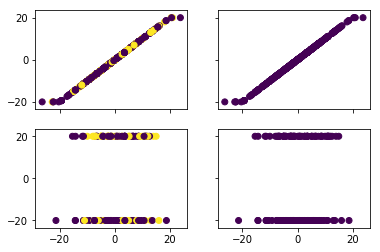

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:25:31<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 85e3fadb-c307-4811-af5a-c6026ea62327



          
  0% |          |[18:25:32<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 85e3fadb-c307-4811-af5a-c6026ea62327



          
  0% |          |[18:25:32<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.85% /s] 
          
  0% |          |[18:25:32<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (85e3fadb-c307-4811-af5a-c6026ea62327) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -3.45853385228 ; MSE : 453.232180981
CrowdAI.Event.Job.COMPLETE : 85e3fadb-c307-4811-af5a-c6026ea62327	   🍺 


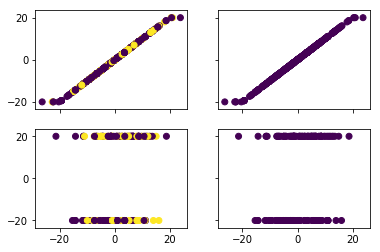

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:25:35<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : b310b7b1-1e2b-44b7-bf42-2e76deb936fb



          
  0% |          |[18:25:36<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : b310b7b1-1e2b-44b7-bf42-2e76deb936fb



          
  0% |          |[18:25:36<?]  ?% /s] 
100% |██████████|[00:00<00:00]  108.52% /s] 
          
  0% |          |[18:25:36<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (b310b7b1-1e2b-44b7-bf42-2e76deb936fb) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -3.52848516291 ; MSE : 460.343080243
CrowdAI.Event.Job.COMPLETE : b310b7b1-1e2b-44b7-bf42-2e76deb936fb	   🍺 


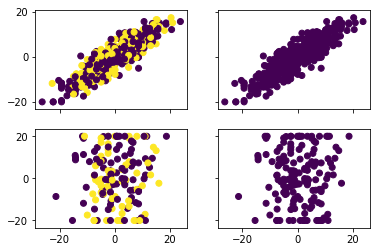

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:25:39<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : fcac5031-2d6a-4d07-807f-91a93817a426


          
  0% |          |[18:25:39<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : fcac5031-2d6a-4d07-807f-91a93817a426


          
  0% |          |[18:25:40<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  105.74% /s] 
  0% |          |[18:25:40<?]  ?% /s] 
100% |██████████|[00:00<00:00]  105.74% /s] 


CrowdAI.Event.Job.INFO : (fcac5031-2d6a-4d07-807f-91a93817a426) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.999833393577 ; MSE : 203.29302874
CrowdAI.Event.Job.COMPLETE : fcac5031-2d6a-4d07-807f-91a93817a426	   🍺 


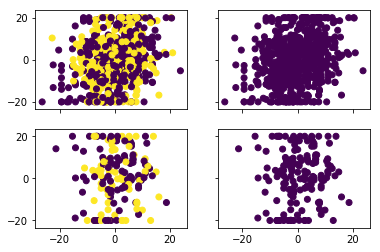

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:25:43<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 94f46e96-a9cb-4a9b-b5d0-2967091bbb68


          
  0% |          |[18:25:43<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 94f46e96-a9cb-4a9b-b5d0-2967091bbb68


          
  0% |          |[18:25:44<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  108.46% /s] 
  0% |          |[18:25:44<?]  ?% /s] 
100% |██████████|[00:00<00:00]  108.46% /s] 


CrowdAI.Event.Job.INFO : (94f46e96-a9cb-4a9b-b5d0-2967091bbb68) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.888107011859 ; MSE : 191.935485355
CrowdAI.Event.Job.COMPLETE : 94f46e96-a9cb-4a9b-b5d0-2967091bbb68	   🍺 


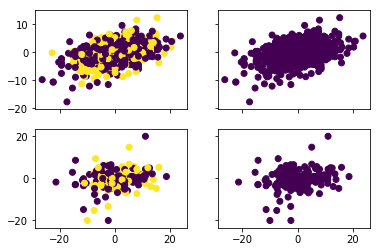

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:25:47<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : ec12c2ff-195b-43fa-a175-45aac0414379



          
  0% |          |[18:25:47<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : ec12c2ff-195b-43fa-a175-45aac0414379



          
  0% |          |[18:25:47<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.11% /s] 
          
  0% |          |[18:25:47<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (ec12c2ff-195b-43fa-a175-45aac0414379) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.377612430171 ; MSE : 63.2687975543
CrowdAI.Event.Job.COMPLETE : ec12c2ff-195b-43fa-a175-45aac0414379	   🍺 


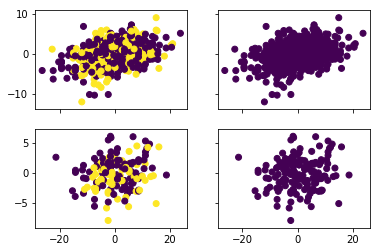

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:25:50<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : f0b42b13-8fba-4379-9ebe-9be0cd379738



          
  0% |          |[18:25:50<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : f0b42b13-8fba-4379-9ebe-9be0cd379738



          
  0% |          |[18:25:51<?]  ?% /s] 
100% |██████████|[00:00<00:00]  102.71% /s] 
          
  0% |          |[18:25:51<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (f0b42b13-8fba-4379-9ebe-9be0cd379738) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.398935675407 ; MSE : 61.1011834318
CrowdAI.Event.Job.COMPLETE : f0b42b13-8fba-4379-9ebe-9be0cd379738	   🍺 


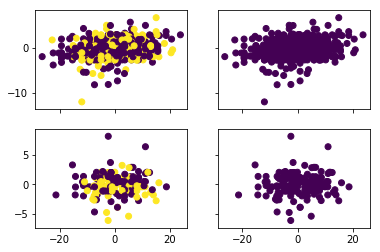

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:25:54<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 859f4307-4f9d-4f98-920c-fb8c79a77973



          
  0% |          |[18:25:54<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 859f4307-4f9d-4f98-920c-fb8c79a77973



          
  0% |          |[18:25:55<?]  ?% /s] 
100% |██████████|[00:00<00:00]  109.18% /s] 
          
  0% |          |[18:25:55<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (859f4307-4f9d-4f98-920c-fb8c79a77973) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.39944758642 ; MSE : 61.0491451266
CrowdAI.Event.Job.COMPLETE : 859f4307-4f9d-4f98-920c-fb8c79a77973	   🍺 


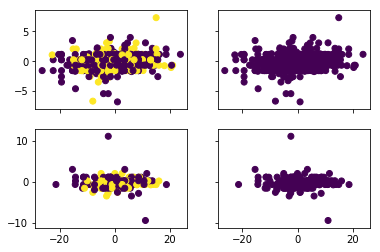

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:25:57<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 18029e48-1a1a-4231-9e2a-65ab287376e7


          
  0% |          |[18:25:58<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 18029e48-1a1a-4231-9e2a-65ab287376e7


          
  0% |          |[18:25:58<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  106.56% /s] 
  0% |          |[18:25:58<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.56% /s] 


CrowdAI.Event.Job.INFO : (18029e48-1a1a-4231-9e2a-65ab287376e7) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.417285669872 ; MSE : 59.2358150645
CrowdAI.Event.Job.COMPLETE : 18029e48-1a1a-4231-9e2a-65ab287376e7	   🍺 


In [179]:
lm_os_res = topsnp_model(m=linear_model.LinearRegression(),X=X.iloc[2747:3530,],y=y_residual,df_test=df_test,val_idx=os_val_idx,residual=True)

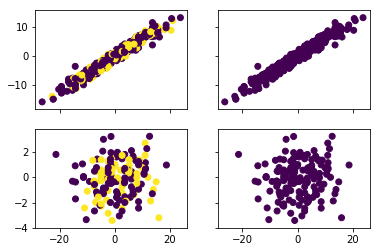

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:29:50<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : cc1af642-f44e-416d-b2ad-15815b3129f3



          
  0% |          |[18:29:50<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : cc1af642-f44e-416d-b2ad-15815b3129f3



          
  0% |          |[18:29:50<?]  ?% /s] 
100% |██████████|[00:00<00:00]  105.36% /s] 
          
  0% |          |[18:29:50<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (cc1af642-f44e-416d-b2ad-15815b3129f3) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.413829944166 ; MSE : 59.5871068009
CrowdAI.Event.Job.COMPLETE : cc1af642-f44e-416d-b2ad-15815b3129f3	   🍺 


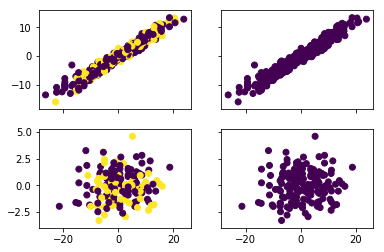

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:29:55<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 6c191bfb-df8b-4a40-b1a2-0f7b81f72a15



          
  0% |          |[18:29:55<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 6c191bfb-df8b-4a40-b1a2-0f7b81f72a15



          
  0% |          |[18:29:56<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.50% /s] 
          
  0% |          |[18:29:56<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (6c191bfb-df8b-4a40-b1a2-0f7b81f72a15) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.414466980095 ; MSE : 59.5223489246
CrowdAI.Event.Job.COMPLETE : 6c191bfb-df8b-4a40-b1a2-0f7b81f72a15	   🍺 


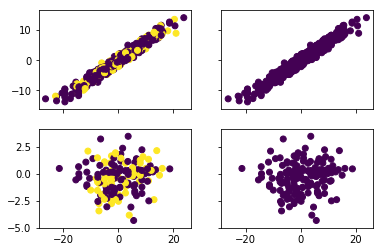

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:30:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : eedc8434-5eeb-42e1-b7c0-d16e6b44f161



          
  0% |          |[18:30:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : eedc8434-5eeb-42e1-b7c0-d16e6b44f161



          
  0% |          |[18:30:01<?]  ?% /s] 
100% |██████████|[00:01<00:00]  90.21% /s] 
          
  0% |          |[18:30:01<?]  ?% /s]  /s] 


CrowdAI.Event.Job.INFO : (eedc8434-5eeb-42e1-b7c0-d16e6b44f161) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.416618159236 ; MSE : 59.3036708465
CrowdAI.Event.Job.COMPLETE : eedc8434-5eeb-42e1-b7c0-d16e6b44f161	   🍺 


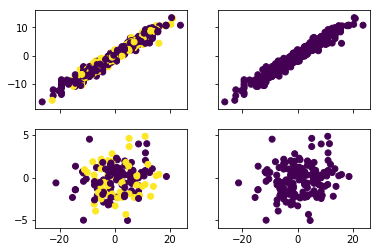

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:30:05<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 4ae230c6-e47d-47dd-a98b-d05798e8cfc2



          
  0% |          |[18:30:05<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 4ae230c6-e47d-47dd-a98b-d05798e8cfc2



          
  0% |          |[18:30:05<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.29% /s] 
          
  0% |          |[18:30:05<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (4ae230c6-e47d-47dd-a98b-d05798e8cfc2) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.418212690672 ; MSE : 59.1415787813
CrowdAI.Event.Job.COMPLETE : 4ae230c6-e47d-47dd-a98b-d05798e8cfc2	   🍺 


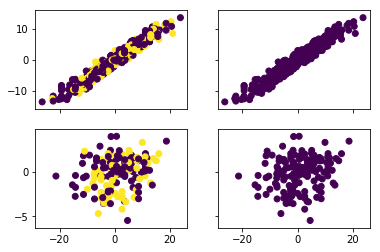

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:30:09<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 530b09e6-bb52-4b66-afab-d35b01bdc516



          
  0% |          |[18:30:09<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 530b09e6-bb52-4b66-afab-d35b01bdc516



          
  0% |          |[18:30:10<?]  ?% /s] 
100% |██████████|[00:00<00:00]  109.00% /s] 
          
  0% |          |[18:30:10<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (530b09e6-bb52-4b66-afab-d35b01bdc516) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.398994090279 ; MSE : 61.095245269
CrowdAI.Event.Job.COMPLETE : 530b09e6-bb52-4b66-afab-d35b01bdc516	   🍺 


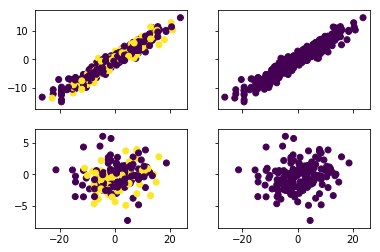

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:30:14<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 1125db28-d2b6-4445-80c8-99431af05127



          
  0% |          |[18:30:14<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 1125db28-d2b6-4445-80c8-99431af05127



          
  0% |          |[18:30:14<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.41% /s] 
          
  0% |          |[18:30:14<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (1125db28-d2b6-4445-80c8-99431af05127) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.371199011809 ; MSE : 63.920753486
CrowdAI.Event.Job.COMPLETE : 1125db28-d2b6-4445-80c8-99431af05127	   🍺 


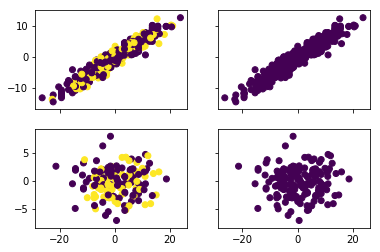

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:30:18<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 16d4efd7-d38d-4a72-b658-745992957407



          
  0% |          |[18:30:18<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 16d4efd7-d38d-4a72-b658-745992957407



          
  0% |          |[18:30:19<?]  ?% /s] 
100% |██████████|[00:00<00:00]  103.86% /s] 
          
  0% |          |[18:30:19<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (16d4efd7-d38d-4a72-b658-745992957407) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.390716107728 ; MSE : 61.9367434407
CrowdAI.Event.Job.COMPLETE : 16d4efd7-d38d-4a72-b658-745992957407	   🍺 


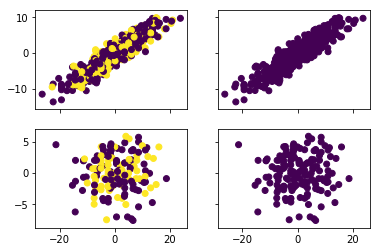

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:30:22<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 33fae0f7-20f1-4a31-a838-943476b0143b



          
  0% |          |[18:30:23<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 33fae0f7-20f1-4a31-a838-943476b0143b



          
  0% |          |[18:30:23<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.44% /s] 
          
  0% |          |[18:30:23<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (33fae0f7-20f1-4a31-a838-943476b0143b) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.388943547186 ; MSE : 62.1169330517
CrowdAI.Event.Job.COMPLETE : 33fae0f7-20f1-4a31-a838-943476b0143b	   🍺 


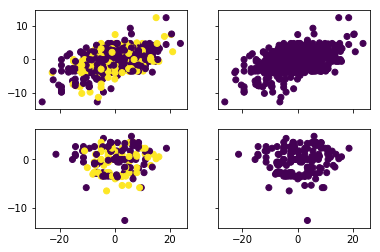

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:30:27<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 6ac2c5d0-7e9e-4e8c-b4b9-51834639e8c1


          
  0% |          |[18:30:27<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 6ac2c5d0-7e9e-4e8c-b4b9-51834639e8c1


          
  0% |          |[18:30:28<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  106.57% /s] 
  0% |          |[18:30:28<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.57% /s] 


CrowdAI.Event.Job.INFO : (6ac2c5d0-7e9e-4e8c-b4b9-51834639e8c1) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.327395795869 ; MSE : 68.3735686383
CrowdAI.Event.Job.COMPLETE : 6ac2c5d0-7e9e-4e8c-b4b9-51834639e8c1	   🍺 


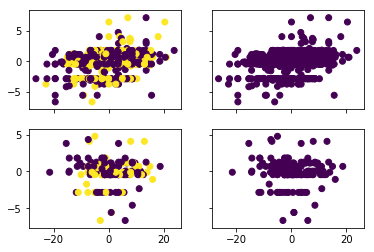

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:30:31<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 4249a476-a498-48d3-ab59-87a13ec8c76b


          
  0% |          |[18:30:32<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 4249a476-a498-48d3-ab59-87a13ec8c76b


          
  0% |          |[18:30:32<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  108.59% /s] 
  0% |          |[18:30:32<?]  ?% /s] 
100% |██████████|[00:00<00:00]  108.59% /s] 


CrowdAI.Event.Job.INFO : (4249a476-a498-48d3-ab59-87a13ec8c76b) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.396440227609 ; MSE : 61.3548581342
CrowdAI.Event.Job.COMPLETE : 4249a476-a498-48d3-ab59-87a13ec8c76b	   🍺 


In [181]:
m=RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,n_jobs=-1, oob_score=True)
rf_os_res = topsnp_model(m=m,X=X.iloc[2747:3530,],y=y_residual,df_test=df_test,val_idx=os_val_idx,residual=True)

## 2.2 Random Forest with os data

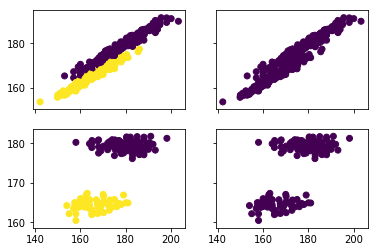

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:36:58<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : a8861aef-6c84-4f56-88d7-a8fea23cd3e5



          
  0% |          |[18:36:59<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : a8861aef-6c84-4f56-88d7-a8fea23cd3e5



          
  0% |          |[18:36:59<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.20% /s] 
          
  0% |          |[18:36:59<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (a8861aef-6c84-4f56-88d7-a8fea23cd3e5) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.423053785761 ; MSE : 58.6494573444
CrowdAI.Event.Job.COMPLETE : a8861aef-6c84-4f56-88d7-a8fea23cd3e5	   🍺 


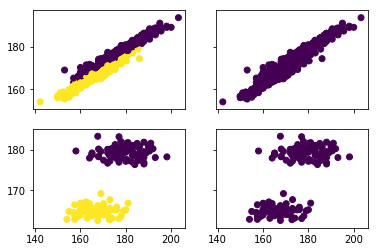

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:37:03<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 3383f4ff-b7e2-4b71-a00d-177bdf84a0f1



          
  0% |          |[18:37:04<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 3383f4ff-b7e2-4b71-a00d-177bdf84a0f1



          
  0% |          |[18:37:05<?]  ?% /s] 
100% |██████████|[00:01<00:00]  59.49% /s] 
          
  0% |          |[18:37:05<?]  ?% /s]  /s] 


CrowdAI.Event.Job.INFO : (3383f4ff-b7e2-4b71-a00d-177bdf84a0f1) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.428821862051 ; MSE : 58.0631036498
CrowdAI.Event.Job.COMPLETE : 3383f4ff-b7e2-4b71-a00d-177bdf84a0f1	   🍺 


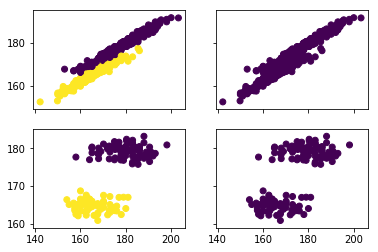

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:37:09<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 97859481-5e5d-4527-8bd8-d27886a2f78e



          
  0% |          |[18:37:09<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 97859481-5e5d-4527-8bd8-d27886a2f78e



          
  0% |          |[18:37:10<?]  ?% /s] 
100% |██████████|[00:01<00:00]  91.52% /s] 
          
  0% |          |[18:37:10<?]  ?% /s]  /s] 


CrowdAI.Event.Job.INFO : (97859481-5e5d-4527-8bd8-d27886a2f78e) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.409538720187 ; MSE : 60.0233310996
CrowdAI.Event.Job.COMPLETE : 97859481-5e5d-4527-8bd8-d27886a2f78e	   🍺 


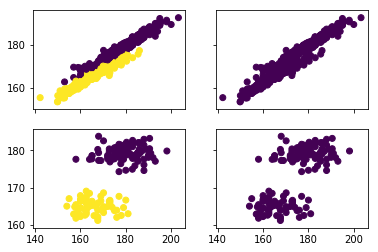

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:37:14<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : cfe91313-3aa7-4c30-84d0-355d3e877eee



          
  0% |          |[18:37:14<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : cfe91313-3aa7-4c30-84d0-355d3e877eee



          
  0% |          |[18:37:14<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.83% /s] 
          
  0% |          |[18:37:14<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (cfe91313-3aa7-4c30-84d0-355d3e877eee) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.404360333245 ; MSE : 60.5497399338
CrowdAI.Event.Job.COMPLETE : cfe91313-3aa7-4c30-84d0-355d3e877eee	   🍺 


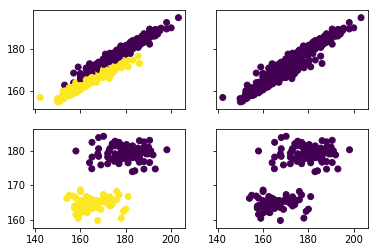

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:37:18<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 086c4a22-06b2-4f0a-adf9-aac32313305e



          
  0% |          |[18:37:19<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 086c4a22-06b2-4f0a-adf9-aac32313305e



          
  0% |          |[18:37:19<?]  ?% /s] 
100% |██████████|[00:00<00:00]  104.08% /s] 
          
  0% |          |[18:37:19<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (086c4a22-06b2-4f0a-adf9-aac32313305e) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.390193975799 ; MSE : 61.9898207529
CrowdAI.Event.Job.COMPLETE : 086c4a22-06b2-4f0a-adf9-aac32313305e	   🍺 


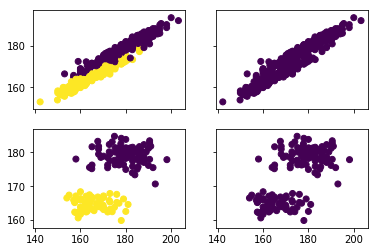

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:37:23<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 757a1092-4cfa-4905-95a5-e452043d909e


          
  0% |          |[18:37:23<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 757a1092-4cfa-4905-95a5-e452043d909e


          
  0% |          |[18:37:24<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  104.91% /s] 
  0% |          |[18:37:24<?]  ?% /s] 
100% |██████████|[00:00<00:00]  104.91% /s] 


CrowdAI.Event.Job.INFO : (757a1092-4cfa-4905-95a5-e452043d909e) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.366697104142 ; MSE : 64.3783948313
CrowdAI.Event.Job.COMPLETE : 757a1092-4cfa-4905-95a5-e452043d909e	   🍺 


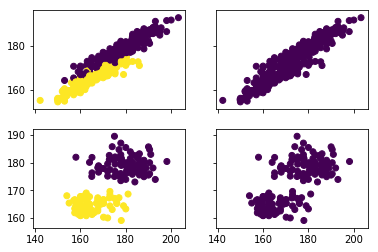

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:37:27<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 214beb17-911f-470f-959f-8d8200614afb


          
  0% |          |[18:37:28<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 214beb17-911f-470f-959f-8d8200614afb


          
  0% |          |[18:37:28<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  106.18% /s] 
  0% |          |[18:37:28<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.18% /s] 


CrowdAI.Event.Job.INFO : (214beb17-911f-470f-959f-8d8200614afb) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.360462556663 ; MSE : 65.0121676465
CrowdAI.Event.Job.COMPLETE : 214beb17-911f-470f-959f-8d8200614afb	   🍺 


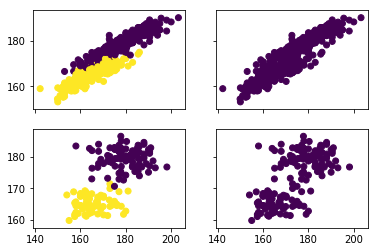

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:37:32<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : dc3de864-ea5d-4df6-a0b8-8b9be611f45e


          
  0% |          |[18:37:32<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : dc3de864-ea5d-4df6-a0b8-8b9be611f45e


          
  0% |          |[18:37:33<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  104.88% /s] 
  0% |          |[18:37:33<?]  ?% /s] 
100% |██████████|[00:00<00:00]  104.88% /s] 


CrowdAI.Event.Job.INFO : (dc3de864-ea5d-4df6-a0b8-8b9be611f45e) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.340076142137 ; MSE : 67.0845482596
CrowdAI.Event.Job.COMPLETE : dc3de864-ea5d-4df6-a0b8-8b9be611f45e	   🍺 


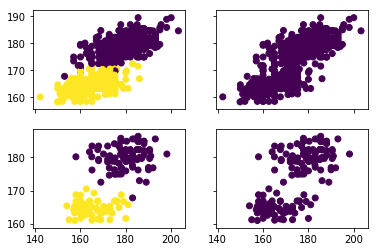

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:37:36<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 060b7f1c-a3e2-49ab-9bdb-4b5a01ee055e


          
  0% |          |[18:37:37<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 060b7f1c-a3e2-49ab-9bdb-4b5a01ee055e


          
  0% |          |[18:37:37<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  108.83% /s] 
  0% |          |[18:37:37<?]  ?% /s] 
100% |██████████|[00:00<00:00]  108.83% /s] 


CrowdAI.Event.Job.INFO : (060b7f1c-a3e2-49ab-9bdb-4b5a01ee055e) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.305878515363 ; MSE : 70.5609074128
CrowdAI.Event.Job.COMPLETE : 060b7f1c-a3e2-49ab-9bdb-4b5a01ee055e	   🍺 


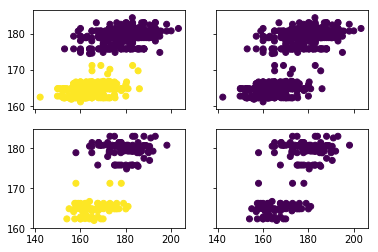

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:37:41<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 6db49e0e-e4c8-433d-8eaf-c1877fca68b0


          
  0% |          |[18:37:41<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 6db49e0e-e4c8-433d-8eaf-c1877fca68b0


          
  0% |          |[18:37:41<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  107.54% /s] 
  0% |          |[18:37:41<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.54% /s] 


CrowdAI.Event.Job.INFO : (6db49e0e-e4c8-433d-8eaf-c1877fca68b0) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.372527181691 ; MSE : 63.7857383998
CrowdAI.Event.Job.COMPLETE : 6db49e0e-e4c8-433d-8eaf-c1877fca68b0	   🍺 


In [183]:
m=RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,n_jobs=-1, oob_score=True)
rf_os = topsnp_model(m=m,X=X.iloc[2747:3530,],y=y.iloc[2747:3530,],df_test=df_test,val_idx=os_val_idx)

## 2.3 NN model with os data

# 3. TZ DATA

## 3.1 Linear Model with tz data

### Sample seperation of tz data

2747 2197


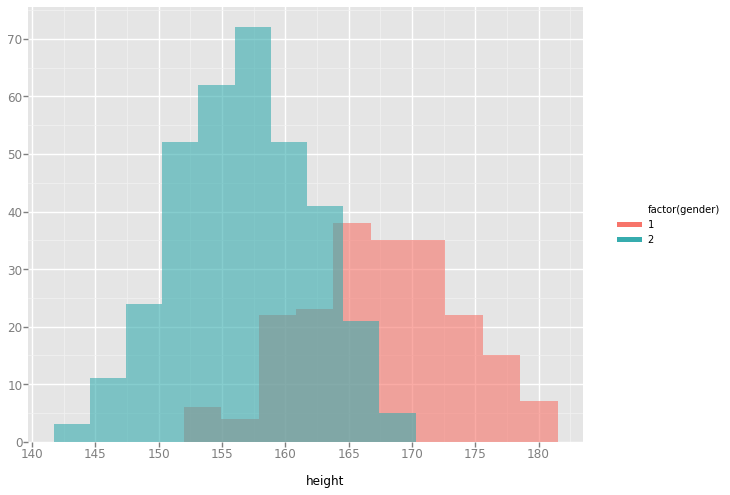

<ggplot: (-9223363276567812650)>

In [186]:
tz_meta = all_meta.iloc[0:2747,]
samp_size=len(tz_meta)
train_ratio = 0.8
train_size = int(samp_size * train_ratio)

import random
tz_val_idx = random.sample(range(samp_size), samp_size-train_size)
print(samp_size,train_size)
ggplot( aes(x='height',fill='factor(gender)'),data=tz_meta.iloc[tz_val_idx,]) +\
    geom_histogram(alpha=0.6)

### 3.1.1 Linear Model with tz data by top 10000, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10 snps

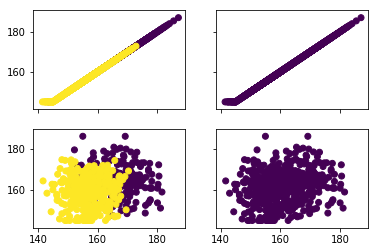

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:43:17<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : bcf6afa7-01b2-4df2-aa72-a2a56526e29f


          
  0% |          |[18:43:17<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : bcf6afa7-01b2-4df2-aa72-a2a56526e29f


          
  0% |          |[18:43:18<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  104.02% /s] 
  0% |          |[18:43:18<?]  ?% /s] 
100% |██████████|[00:00<00:00]  104.02% /s] 


CrowdAI.Event.Job.INFO : (bcf6afa7-01b2-4df2-aa72-a2a56526e29f) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -1.37377875811 ; MSE : 241.306438248
CrowdAI.Event.Job.COMPLETE : bcf6afa7-01b2-4df2-aa72-a2a56526e29f	   🍺 


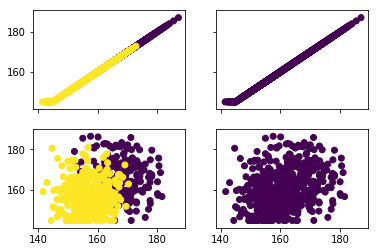

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:43:23<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 3e5b11d1-8b74-40ca-bb03-f5f2bedb794a


          
  0% |          |[18:43:23<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 3e5b11d1-8b74-40ca-bb03-f5f2bedb794a


          
  0% |          |[18:43:24<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  106.25% /s] 
  0% |          |[18:43:24<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.25% /s] 


CrowdAI.Event.Job.INFO : (3e5b11d1-8b74-40ca-bb03-f5f2bedb794a) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -1.37702433951 ; MSE : 241.636367769
CrowdAI.Event.Job.COMPLETE : 3e5b11d1-8b74-40ca-bb03-f5f2bedb794a	   🍺 


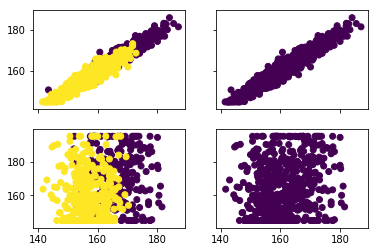

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:43:28<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : e106598b-3157-44b5-b6f6-5000ee0eaba7


          
  0% |          |[18:43:28<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : e106598b-3157-44b5-b6f6-5000ee0eaba7


          
  0% |          |[18:43:29<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  105.00% /s] 
  0% |          |[18:43:29<?]  ?% /s] 
100% |██████████|[00:00<00:00]  105.00% /s] 


CrowdAI.Event.Job.INFO : (e106598b-3157-44b5-b6f6-5000ee0eaba7) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -4.72929821739 ; MSE : 582.411710349
CrowdAI.Event.Job.COMPLETE : e106598b-3157-44b5-b6f6-5000ee0eaba7	   🍺 


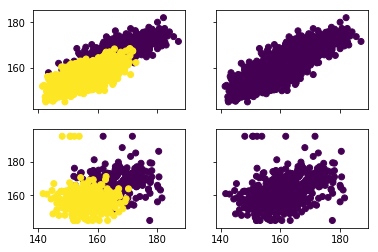

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:43:32<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 67213bcf-77c8-4d43-8f30-8421d64785e3


          
  0% |          |[18:43:32<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 67213bcf-77c8-4d43-8f30-8421d64785e3


          
  0% |          |[18:43:33<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  108.78% /s] 
  0% |          |[18:43:33<?]  ?% /s] 
100% |██████████|[00:00<00:00]  108.78% /s] 


CrowdAI.Event.Job.INFO : (67213bcf-77c8-4d43-8f30-8421d64785e3) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -2.49456254867 ; MSE : 355.239694927
CrowdAI.Event.Job.COMPLETE : 67213bcf-77c8-4d43-8f30-8421d64785e3	   🍺 


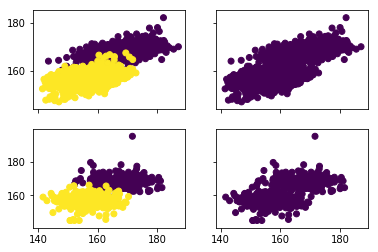

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:43:36<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : b6b107fd-ca2b-4b3d-9c48-23217add0b93


          
  0% |          |[18:43:36<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : b6b107fd-ca2b-4b3d-9c48-23217add0b93


          
  0% |          |[18:43:37<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  106.37% /s] 
  0% |          |[18:43:37<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.37% /s] 


CrowdAI.Event.Job.INFO : (b6b107fd-ca2b-4b3d-9c48-23217add0b93) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -3.17310314016 ; MSE : 424.216726919
CrowdAI.Event.Job.COMPLETE : b6b107fd-ca2b-4b3d-9c48-23217add0b93	   🍺 


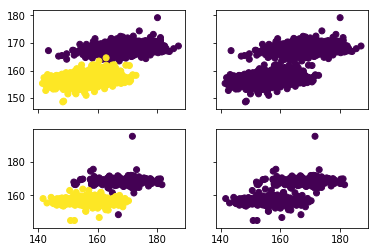

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:43:40<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : ce30b768-698b-4bf3-89b6-7aee39a7de1a


          
  0% |          |[18:43:40<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : ce30b768-698b-4bf3-89b6-7aee39a7de1a


          
  0% |          |[18:43:40<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  106.06% /s] 
  0% |          |[18:43:40<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.06% /s] 


CrowdAI.Event.Job.INFO : (ce30b768-698b-4bf3-89b6-7aee39a7de1a) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -1.45638261035 ; MSE : 249.703531407
CrowdAI.Event.Job.COMPLETE : ce30b768-698b-4bf3-89b6-7aee39a7de1a	   🍺 


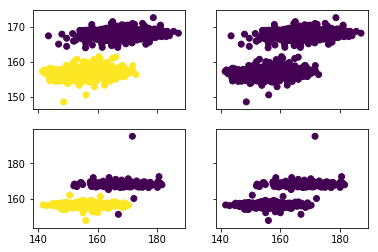

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:43:44<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : f139b95b-5845-4a61-af39-d16c938d9bac


          
  0% |          |[18:43:44<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : f139b95b-5845-4a61-af39-d16c938d9bac


          
  0% |          |[18:43:44<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  104.57% /s] 
  0% |          |[18:43:44<?]  ?% /s] 
100% |██████████|[00:00<00:00]  104.57% /s] 


CrowdAI.Event.Job.INFO : (f139b95b-5845-4a61-af39-d16c938d9bac) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -1.3557762864 ; MSE : 239.476397301
CrowdAI.Event.Job.COMPLETE : f139b95b-5845-4a61-af39-d16c938d9bac	   🍺 


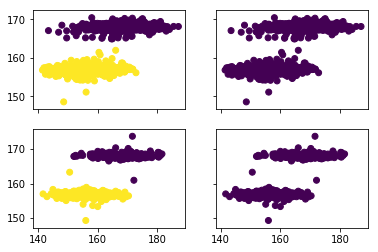

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:43:48<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 9f12ca1b-47f0-4a63-bdbe-1e2b09242a01


          
  0% |          |[18:43:48<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 9f12ca1b-47f0-4a63-bdbe-1e2b09242a01


          
  0% |          |[18:43:48<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  108.23% /s] 
  0% |          |[18:43:48<?]  ?% /s] 
100% |██████████|[00:00<00:00]  108.23% /s] 


CrowdAI.Event.Job.INFO : (9f12ca1b-47f0-4a63-bdbe-1e2b09242a01) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.672267701895 ; MSE : 169.994344066
CrowdAI.Event.Job.COMPLETE : 9f12ca1b-47f0-4a63-bdbe-1e2b09242a01	   🍺 


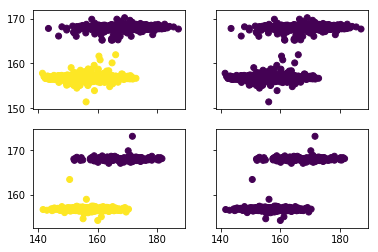

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:43:52<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 8183f924-13fd-46b8-847d-e6a3f38af826


          
  0% |          |[18:43:52<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 8183f924-13fd-46b8-847d-e6a3f38af826


          
  0% |          |[18:43:52<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  104.15% /s] 
  0% |          |[18:43:52<?]  ?% /s] 
100% |██████████|[00:00<00:00]  104.15% /s] 


CrowdAI.Event.Job.INFO : (8183f924-13fd-46b8-847d-e6a3f38af826) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.649844421798 ; MSE : 167.714905919
CrowdAI.Event.Job.COMPLETE : 8183f924-13fd-46b8-847d-e6a3f38af826	   🍺 


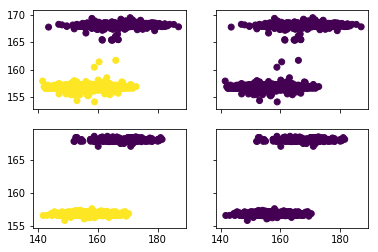

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:43:56<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : d9ea9b75-5e9d-4a8d-88b4-0f97c14a7016


          
  0% |          |[18:43:56<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : d9ea9b75-5e9d-4a8d-88b4-0f97c14a7016


          
  0% |          |[18:43:56<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  106.40% /s] 
  0% |          |[18:43:56<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.40% /s] 


CrowdAI.Event.Job.INFO : (d9ea9b75-5e9d-4a8d-88b4-0f97c14a7016) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.650651698204 ; MSE : 167.796969588
CrowdAI.Event.Job.COMPLETE : d9ea9b75-5e9d-4a8d-88b4-0f97c14a7016	   🍺 


In [187]:
lm_tz = topsnp_model(m=linear_model.LinearRegression(),X=X.iloc[0:2747,],y=y.iloc[0:2747,],df_test=df_test,val_idx=tz_val_idx)

### 3.1.2 Residual Model with tz data by top 10000, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10 snps

In [189]:
#Load training data
x_train = X.iloc[0:2747,]
x_train = x_train[['gender','nationality']]
y_train = y.iloc[0:2747,]
x_test = df_test[['gender','nationality']]

# Instantiate a linear model
tz_gender_nation_ml = linear_model.LinearRegression()
tz_gender_nation_ml.fit(x_train, y_train)

# Predict the heights for the test set
heights = tz_gender_nation_ml.predict(x_test)
#Convert heights from np.array to a list (to ensure it is JSON serializable)
heights = heights.tolist()

# Create the challenge object by authentication with crowdAI with your API_KEY
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
challenge.submit(heights)
challenge.disconnect()

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:47:23<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : f3403021-9dc4-4305-a02c-fdad9fe07334



          
  0% |          |[18:47:23<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : f3403021-9dc4-4305-a02c-fdad9fe07334



          
  0% |          |[18:47:23<?]  ?% /s] 
100% |██████████|[00:00<00:00]  104.33% /s] 
          
  0% |          |[18:47:23<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (f3403021-9dc4-4305-a02c-fdad9fe07334) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.66946943213 ; MSE : 169.709886001
CrowdAI.Event.Job.COMPLETE : f3403021-9dc4-4305-a02c-fdad9fe07334	   🍺 


(array([  2.,   8.,  56., 204., 610., 828., 642., 312.,  77.,   8.]),
 array([-24.40627, -20.05627, -15.70627, -11.35627,  -7.00627,  -2.65627,   1.69373,   6.04373,  10.39373,
         14.74373,  19.09373]),
 <a list of 10 Patch objects>)

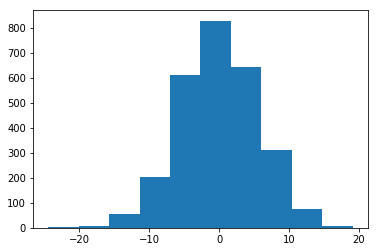

In [190]:
plt.hist(y_train-tz_gender_nation_ml.predict(x_train))

In [191]:
y_residual=y_train-tz_gender_nation_ml.predict(x_train)

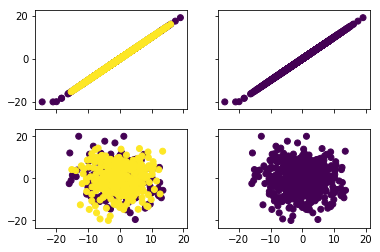

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:51:56<?]  ?% /s] 
          
  0% |          |[18:51:56<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 915ae5f8-31fc-40c8-aed1-6287b83a8a61
CrowdAI.Event.Job.RUNNING : 915ae5f8-31fc-40c8-aed1-6287b83a8a61



          
  0% |          |[18:51:56<?]  ?% /s] 

CrowdAI.Event.Job.INFO : (915ae5f8-31fc-40c8-aed1-6287b83a8a61) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.227779212607 ; MSE : 124.809874441



100% |██████████|[00:01<00:00]  69.98% /s] 
          
  0% |          |[18:51:57<?]  ?% /s]  /s] 


CrowdAI.Event.Job.COMPLETE : 915ae5f8-31fc-40c8-aed1-6287b83a8a61	   🍺 


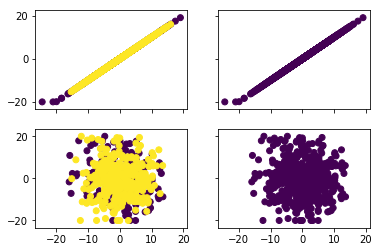

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED
CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



  0% |          |[00:00<?]  ?% /s] 
          
  0% |          |[18:52:03<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : f7645425-479c-4406-8bd5-c73450b32bc4



          
  0% |          |[18:52:04<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : f7645425-479c-4406-8bd5-c73450b32bc4



          
  0% |          |[18:52:04<?]  ?% /s] 

CrowdAI.Event.Job.INFO : (f7645425-479c-4406-8bd5-c73450b32bc4) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.615235640677 ; MSE : 164.196750877



100% |██████████|[00:01<00:00]  67.55% /s] 
          
  0% |          |[18:52:05<?]  ?% /s]  /s] 


CrowdAI.Event.Job.COMPLETE : f7645425-479c-4406-8bd5-c73450b32bc4	   🍺 


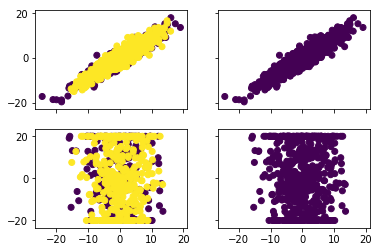

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Connection.CONNECTED
CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:52:11<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 9e509ca4-e9e0-4659-8deb-7d428984f7be



          
  0% |          |[18:52:11<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 9e509ca4-e9e0-4659-8deb-7d428984f7be



          
  0% |          |[18:52:12<?]  ?% /s] 

CrowdAI.Event.Job.INFO : (9e509ca4-e9e0-4659-8deb-7d428984f7be) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -2.81015864268 ; MSE : 387.321610358



100% |██████████|[00:05<00:00]  17.75% /s] 
          
  0% |          |[18:52:16<?]  ?% /s]  /s] 

CrowdAI.Event.Job.COMPLETE : 9e509ca4-e9e0-4659-8deb-7d428984f7be	   🍺 


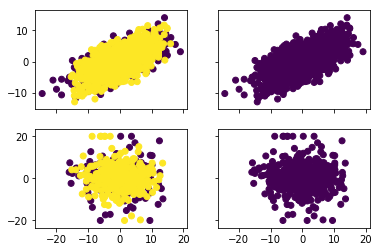

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:52:23<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : ab2ea720-71e5-477d-a599-b67cc1525dd2



          
  0% |          |[18:52:23<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : ab2ea720-71e5-477d-a599-b67cc1525dd2



          
  0% |          |[18:52:24<?]  ?% /s] 

CrowdAI.Event.Job.INFO : (ab2ea720-71e5-477d-a599-b67cc1525dd2) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -1.19726970837 ; MSE : 223.363413876



100% |██████████|[00:01<00:00]  68.35% /s] 
          
  0% |          |[18:52:24<?]  ?% /s]  /s] 

CrowdAI.Event.Job.COMPLETE : ab2ea720-71e5-477d-a599-b67cc1525dd2	   🍺 


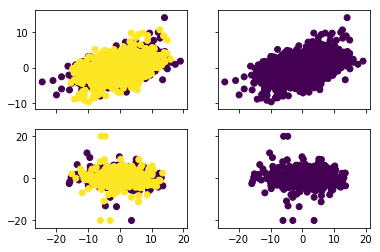

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:52:30<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 2ac24476-c8e8-4d1f-8875-7a7093f306ee



          
  0% |          |[18:52:31<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 2ac24476-c8e8-4d1f-8875-7a7093f306ee



          
  0% |          |[18:52:31<?]  ?% /s] 

CrowdAI.Event.Job.INFO : (2ac24476-c8e8-4d1f-8875-7a7093f306ee) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -1.29102819659 ; MSE : 232.894431361



100% |██████████|[00:01<00:00]  68.06% /s] 
          
  0% |          |[18:52:32<?]  ?% /s]  /s] 


CrowdAI.Event.Job.COMPLETE : 2ac24476-c8e8-4d1f-8875-7a7093f306ee	   🍺 


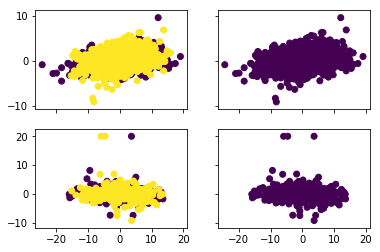

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:52:37<?]  ?% /s] 
          
  0% |          |[18:52:37<?]  ?% /s] 
          
  0% |          |[18:52:37<?]  ?% /s] 
100% |██████████|[00:01<00:00]  81.06% /s] 
          
  0% |          |[18:52:37<?]  ?% /s]  /s] 

CrowdAI.Event.Job.ENQUEUED : f976cb2a-aefc-44ca-a364-1029259307c1
CrowdAI.Event.Job.RUNNING : f976cb2a-aefc-44ca-a364-1029259307c1
CrowdAI.Event.Job.INFO : (f976cb2a-aefc-44ca-a364-1029259307c1) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.493836918685 ; MSE : 151.855965911
CrowdAI.Event.Job.COMPLETE : f976cb2a-aefc-44ca-a364-1029259307c1	   🍺 


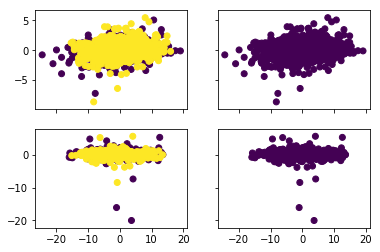

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:52:44<?]  ?% /s] 
          
  0% |          |[18:52:44<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : d9f561c3-6004-4874-8d78-8096da128418
CrowdAI.Event.Job.RUNNING : d9f561c3-6004-4874-8d78-8096da128418



          
  0% |          |[18:52:44<?]  ?% /s] 

CrowdAI.Event.Job.INFO : (d9f561c3-6004-4874-8d78-8096da128418) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.351369804186 ; MSE : 137.373473872



100% |██████████|[00:02<00:00]  39.59% /s] 
          
  0% |          |[18:52:45<?]  ?% /s]  /s] 


CrowdAI.Event.Job.COMPLETE : d9f561c3-6004-4874-8d78-8096da128418	   🍺 


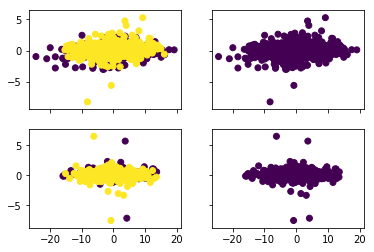

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:52:49<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 302f8e0d-e2ed-4373-a67f-d932552207f3



          
  0% |          |[18:52:49<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 302f8e0d-e2ed-4373-a67f-d932552207f3



          
  0% |          |[18:52:50<?]  ?% /s] 
100% |██████████|[00:00<00:00]  103.82% /s] 
          
  0% |          |[18:52:50<?]  ?% /s] % /s] 

CrowdAI.Event.Job.INFO : (302f8e0d-e2ed-4373-a67f-d932552207f3) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.402382260944 ; MSE : 60.7508208391
CrowdAI.Event.Job.COMPLETE : 302f8e0d-e2ed-4373-a67f-d932552207f3	   🍺 


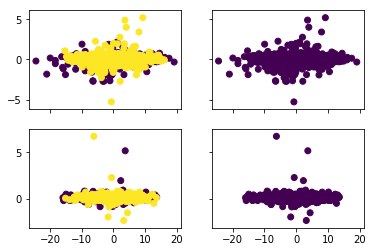

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:52:55<?]  ?% /s] 
          
  0% |          |[18:52:55<?]  ?% /s] 
          
  0% |          |[18:52:55<?]  ?% /s] 
100% |██████████|[00:01<00:00]  82.67% /s] 
          
  0% |          |[18:52:55<?]  ?% /s]  /s] 


CrowdAI.Event.Job.ENQUEUED : 19391883-1d6e-43a3-be7d-1b8af1697c31
CrowdAI.Event.Job.RUNNING : 19391883-1d6e-43a3-be7d-1b8af1697c31
CrowdAI.Event.Job.INFO : (19391883-1d6e-43a3-be7d-1b8af1697c31) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.412036195202 ; MSE : 59.7694503205
CrowdAI.Event.Job.COMPLETE : 19391883-1d6e-43a3-be7d-1b8af1697c31	   🍺 


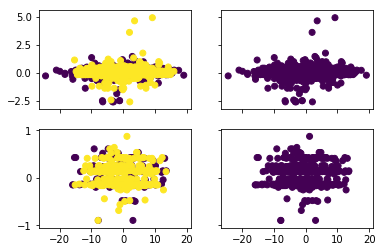

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Connection.CONNECTED
CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[18:53:02<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 0458a2fb-ce19-49f0-b37f-28dd248b89de



          
  0% |          |[18:53:02<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 0458a2fb-ce19-49f0-b37f-28dd248b89de



          
  0% |          |[18:53:03<?]  ?% /s] 
100% |██████████|[00:00<00:00]  108.75% /s] 
          
  0% |          |[18:53:03<?]  ?% /s] % /s] 

CrowdAI.Event.Job.INFO : (0458a2fb-ce19-49f0-b37f-28dd248b89de) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.415380962607 ; MSE : 59.4294380483
CrowdAI.Event.Job.COMPLETE : 0458a2fb-ce19-49f0-b37f-28dd248b89de	   🍺 


In [192]:
lm_tz_res = topsnp_model(m=linear_model.LinearRegression(),X=X.iloc[0:2747,],y=y_residual,df_test=df_test,val_idx=tz_val_idx,residual=True)

In [193]:
lm_tz_res[0]

{7726: (1.0, -1.5045796495706631),
 5000: (1.0, -2.3736183222229936),
 2000: (0.8917452463150234, -7.510944840884488e+19),
 1000: (0.4347773417436489, -1.3370959522078107e+22),
 500: (0.20572926088285015, -1.3861361998299167e+22),
 200: (0.060493647438440545, -9.082903037082111e+22),
 100: (0.023829911817548566, -2.5872883527707057e+20),
 50: (0.01603748319977283, -0.03328456906297217),
 20: (0.0066696453286625434, -0.015221803923703757),
 10: (0.003929487132500298, -0.0021144082255042385)}

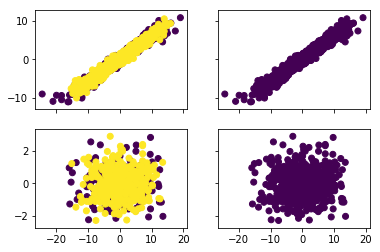

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:56:28<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : ffdd4769-9a36-4517-90f7-fa97b9e7fac2


          
  0% |          |[18:56:29<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : ffdd4769-9a36-4517-90f7-fa97b9e7fac2


          
  0% |          |[18:56:29<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  105.84% /s] 
  0% |          |[18:56:29<?]  ?% /s] 
100% |██████████|[00:00<00:00]  105.84% /s] 


CrowdAI.Event.Job.INFO : (ffdd4769-9a36-4517-90f7-fa97b9e7fac2) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.365059799783 ; MSE : 64.5448349774
CrowdAI.Event.Job.COMPLETE : ffdd4769-9a36-4517-90f7-fa97b9e7fac2	   🍺 


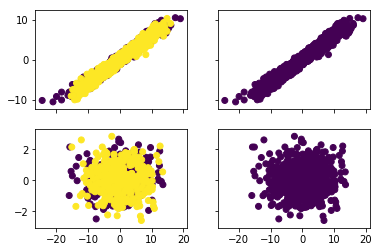

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:56:39<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 20c98e1b-704b-4101-b0ca-f8cd02eebe88


          
  0% |          |[18:56:39<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 20c98e1b-704b-4101-b0ca-f8cd02eebe88


          
  0% |          |[18:56:40<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  108.61% /s] 
  0% |          |[18:56:40<?]  ?% /s] 
100% |██████████|[00:00<00:00]  108.61% /s] 

CrowdAI.Event.Job.INFO : (20c98e1b-704b-4101-b0ca-f8cd02eebe88) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.397466911408 ; MSE : 61.2504906105
CrowdAI.Event.Job.COMPLETE : 20c98e1b-704b-4101-b0ca-f8cd02eebe88	   🍺 


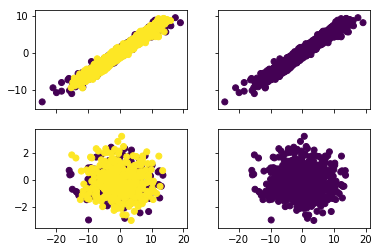

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:56:45<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : a110a5cf-0265-46db-b656-1de72201edb0


          
  0% |          |[18:56:45<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : a110a5cf-0265-46db-b656-1de72201edb0


          
  0% |          |[18:56:46<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  107.11% /s] 
  0% |          |[18:56:46<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.11% /s] 


CrowdAI.Event.Job.INFO : (a110a5cf-0265-46db-b656-1de72201edb0) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.392975193443 ; MSE : 61.7070961219
CrowdAI.Event.Job.COMPLETE : a110a5cf-0265-46db-b656-1de72201edb0	   🍺 


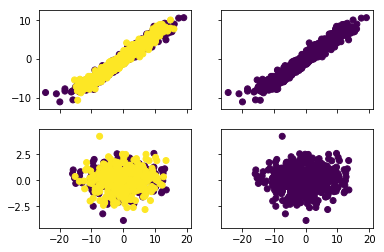

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:56:51<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : bc36f8c3-f524-47c7-93e9-0959e73a20c0


          
  0% |          |[18:56:51<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : bc36f8c3-f524-47c7-93e9-0959e73a20c0


          
  0% |          |[18:56:51<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  109.52% /s] 
  0% |          |[18:56:51<?]  ?% /s] 
100% |██████████|[00:00<00:00]  109.52% /s] 


CrowdAI.Event.Job.INFO : (bc36f8c3-f524-47c7-93e9-0959e73a20c0) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.395329434251 ; MSE : 61.4677758136
CrowdAI.Event.Job.COMPLETE : bc36f8c3-f524-47c7-93e9-0959e73a20c0	   🍺 


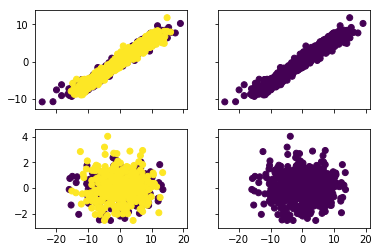

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:56:55<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 598c90a2-49a2-40a9-b154-35be4ef8f5d4


          
  0% |          |[18:56:56<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 598c90a2-49a2-40a9-b154-35be4ef8f5d4


          
  0% |          |[18:56:56<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  107.50% /s] 
  0% |          |[18:56:56<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.50% /s] 


CrowdAI.Event.Job.INFO : (598c90a2-49a2-40a9-b154-35be4ef8f5d4) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.381160491666 ; MSE : 62.9081194248
CrowdAI.Event.Job.COMPLETE : 598c90a2-49a2-40a9-b154-35be4ef8f5d4	   🍺 


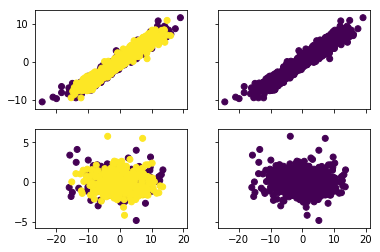

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:57:00<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 23617a5f-7b90-4859-9058-b0f3eeb881ad


          
  0% |          |[18:57:01<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 23617a5f-7b90-4859-9058-b0f3eeb881ad


          
  0% |          |[18:57:01<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  107.23% /s] 
  0% |          |[18:57:01<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.23% /s] 


CrowdAI.Event.Job.INFO : (23617a5f-7b90-4859-9058-b0f3eeb881ad) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.407630861336 ; MSE : 60.2172744578
CrowdAI.Event.Job.COMPLETE : 23617a5f-7b90-4859-9058-b0f3eeb881ad	   🍺 


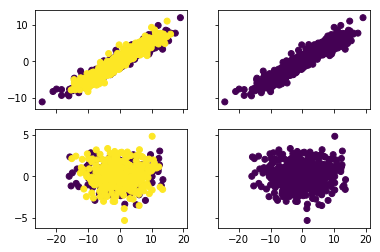

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:57:05<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : f1099fb4-4483-48be-9124-4b366d00c21c


          
  0% |          |[18:57:06<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : f1099fb4-4483-48be-9124-4b366d00c21c


          
  0% |          |[18:57:06<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  109.35% /s] 
  0% |          |[18:57:06<?]  ?% /s] 
100% |██████████|[00:00<00:00]  109.35% /s] 


CrowdAI.Event.Job.INFO : (f1099fb4-4483-48be-9124-4b366d00c21c) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.354203694762 ; MSE : 65.648412144
CrowdAI.Event.Job.COMPLETE : f1099fb4-4483-48be-9124-4b366d00c21c	   🍺 


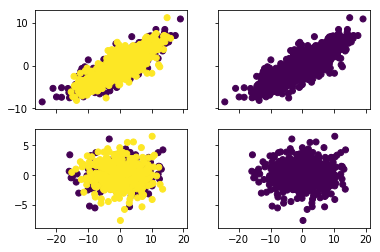

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:57:10<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 3616052c-c0a2-45ff-877c-6eafa5ed8b26


          
  0% |          |[18:57:10<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 3616052c-c0a2-45ff-877c-6eafa5ed8b26


          
  0% |          |[18:57:11<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 
          ██████|[00:00<00:00]  106.13% /s] 
  0% |          |[18:57:11<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.13% /s] 


CrowdAI.Event.Job.INFO : (3616052c-c0a2-45ff-877c-6eafa5ed8b26) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.313329419391 ; MSE : 69.8034858938
CrowdAI.Event.Job.COMPLETE : 3616052c-c0a2-45ff-877c-6eafa5ed8b26	   🍺 


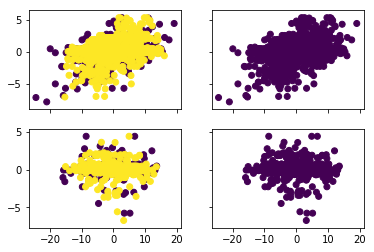

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:57:15<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 42e756f5-ce11-40f2-a211-0438de102ec8


          
  0% |          |[18:57:15<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 42e756f5-ce11-40f2-a211-0438de102ec8


          
  0% |          |[18:57:15<?]  ?% /s] 
  0% |          |[00:01<?]  ?% /s] 
          ██████|[00:01<00:00]  89.53% /s] 
  0% |          |[18:57:15<?]  ?% /s] 
100% |██████████|[00:01<00:00]  89.53% /s] 


CrowdAI.Event.Job.INFO : (42e756f5-ce11-40f2-a211-0438de102ec8) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.346768776926 ; MSE : 66.4042085868
CrowdAI.Event.Job.COMPLETE : 42e756f5-ce11-40f2-a211-0438de102ec8	   🍺 


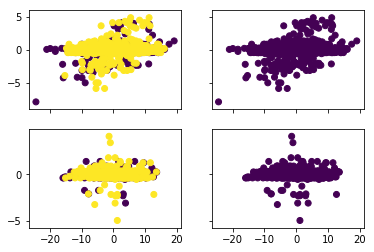

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


          
  0% |          |[18:57:19<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 5ed24d5f-8d44-4df3-9c27-e0d7277dfa67


          
  0% |          |[18:57:20<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 5ed24d5f-8d44-4df3-9c27-e0d7277dfa67


          
  0% |          |[18:57:20<?]  ?% /s] 
  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.INFO : (5ed24d5f-8d44-4df3-9c27-e0d7277dfa67) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.411201584732 ; MSE : 59.8542926333



          ██████|[00:01<00:00]  82.67% /s] 
  0% |          |[18:57:20<?]  ?% /s] 
100% |██████████|[00:01<00:00]  82.67% /s] 


CrowdAI.Event.Job.COMPLETE : 5ed24d5f-8d44-4df3-9c27-e0d7277dfa67	   🍺 


In [194]:
m=RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,n_jobs=-1, oob_score=True)
rf_tz_res = topsnp_model(m=m,X=X.iloc[0:2747,],y=y_residual,df_test=df_test,val_idx=tz_val_idx,residual=True)

## 2.2 Random Forest with os data

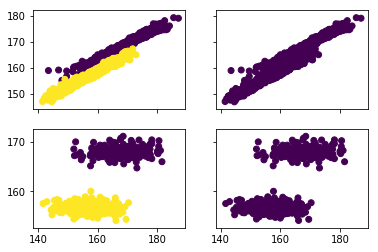

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[19:02:14<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : e03fda57-782c-48a9-8b85-5a6d26133041



          
  0% |          |[19:02:15<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : e03fda57-782c-48a9-8b85-5a6d26133041



          
  0% |          |[19:02:15<?]  ?% /s] 
100% |██████████|[00:00<00:00]  103.73% /s] 
          
  0% |          |[19:02:15<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (e03fda57-782c-48a9-8b85-5a6d26133041) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.80455648942 ; MSE : 183.442158454
CrowdAI.Event.Job.COMPLETE : e03fda57-782c-48a9-8b85-5a6d26133041	   🍺 


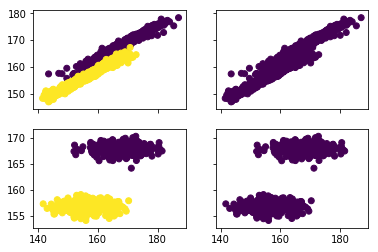

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[19:02:23<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 358dc6b0-ab3f-41f5-a2d6-d454a446b3da



          
  0% |          |[19:02:23<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 358dc6b0-ab3f-41f5-a2d6-d454a446b3da



          
  0% |          |[19:02:23<?]  ?% /s] 
100% |██████████|[00:00<00:00]  109.22% /s] 
          
  0% |          |[19:02:23<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (358dc6b0-ab3f-41f5-a2d6-d454a446b3da) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.77618245227 ; MSE : 180.557796202
CrowdAI.Event.Job.COMPLETE : 358dc6b0-ab3f-41f5-a2d6-d454a446b3da	   🍺 


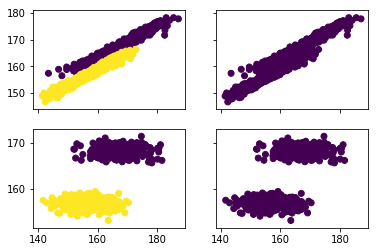

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[19:02:29<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : b77221b6-4fc5-45ee-abfc-9531abdfcbcc



          
  0% |          |[19:02:29<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : b77221b6-4fc5-45ee-abfc-9531abdfcbcc



          
  0% |          |[19:02:29<?]  ?% /s] 
100% |██████████|[00:00<00:00]  105.41% /s] 
          
  0% |          |[19:02:29<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (b77221b6-4fc5-45ee-abfc-9531abdfcbcc) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.760703772666 ; MSE : 178.984311297
CrowdAI.Event.Job.COMPLETE : b77221b6-4fc5-45ee-abfc-9531abdfcbcc	   🍺 


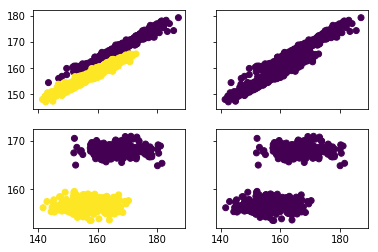

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[19:02:34<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 697664c7-3906-4a62-93e7-22d6dfff8c53



          
  0% |          |[19:02:35<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 697664c7-3906-4a62-93e7-22d6dfff8c53



          
  0% |          |[19:02:35<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.18% /s] 
          
  0% |          |[19:02:35<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (697664c7-3906-4a62-93e7-22d6dfff8c53) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.775030808328 ; MSE : 180.440725858
CrowdAI.Event.Job.COMPLETE : 697664c7-3906-4a62-93e7-22d6dfff8c53	   🍺 


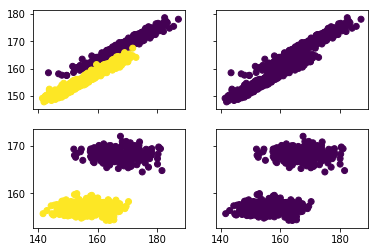

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[19:02:39<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 1a4db803-d14e-4429-9b86-28823f48da17



          
  0% |          |[19:02:39<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 1a4db803-d14e-4429-9b86-28823f48da17



          
  0% |          |[19:02:40<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.07% /s] 
          
  0% |          |[19:02:40<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (1a4db803-d14e-4429-9b86-28823f48da17) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.725312500985 ; MSE : 175.386612192
CrowdAI.Event.Job.COMPLETE : 1a4db803-d14e-4429-9b86-28823f48da17	   🍺 


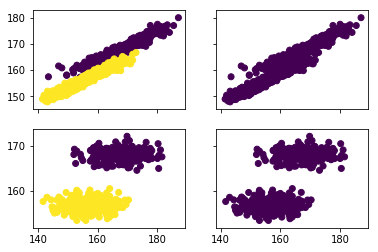

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[19:02:44<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 2aa45447-0eed-437d-ac56-213113fe194f



          
  0% |          |[19:02:44<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 2aa45447-0eed-437d-ac56-213113fe194f



          
  0% |          |[19:02:45<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.87% /s] 
          
  0% |          |[19:02:45<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (2aa45447-0eed-437d-ac56-213113fe194f) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.625721162082 ; MSE : 165.262656373
CrowdAI.Event.Job.COMPLETE : 2aa45447-0eed-437d-ac56-213113fe194f	   🍺 


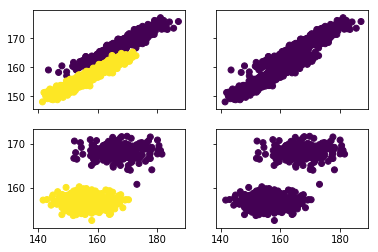

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[19:02:49<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 87e3b57f-e153-420a-8147-d87aac221962



          
  0% |          |[19:02:49<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 87e3b57f-e153-420a-8147-d87aac221962



          
  0% |          |[19:02:50<?]  ?% /s] 
100% |██████████|[00:00<00:00]  104.06% /s] 
          
  0% |          |[19:02:50<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (87e3b57f-e153-420a-8147-d87aac221962) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.624947416698 ; MSE : 165.184001299
CrowdAI.Event.Job.COMPLETE : 87e3b57f-e153-420a-8147-d87aac221962	   🍺 


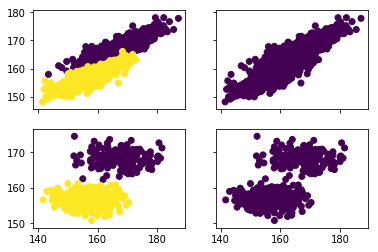

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[19:02:54<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 741b00a0-f604-40b0-9cac-f222770a128e



          
  0% |          |[19:02:54<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 741b00a0-f604-40b0-9cac-f222770a128e



          
  0% |          |[19:02:54<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.11% /s] 
          
  0% |          |[19:02:54<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (741b00a0-f604-40b0-9cac-f222770a128e) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.583057832378 ; MSE : 160.925716336
CrowdAI.Event.Job.COMPLETE : 741b00a0-f604-40b0-9cac-f222770a128e	   🍺 


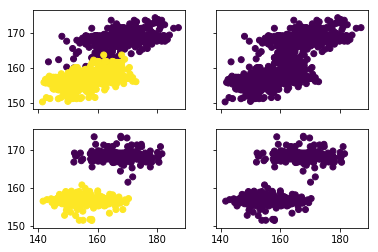

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[19:02:58<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 05fb2e6a-d9a6-4aed-9b23-4ad0dc093dc4



          
  0% |          |[19:02:58<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 05fb2e6a-d9a6-4aed-9b23-4ad0dc093dc4



          
  0% |          |[19:02:59<?]  ?% /s] 
100% |██████████|[00:00<00:00]  107.44% /s] 
          
  0% |          |[19:02:59<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (05fb2e6a-d9a6-4aed-9b23-4ad0dc093dc4) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.667602408469 ; MSE : 169.520093744
CrowdAI.Event.Job.COMPLETE : 05fb2e6a-d9a6-4aed-9b23-4ad0dc093dc4	   🍺 


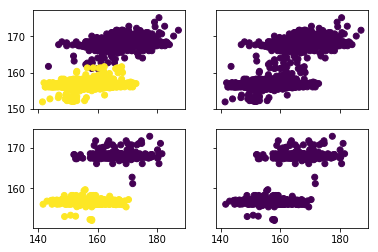

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[19:03:03<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 86a05c9a-21ee-4bb4-97a3-b5a6a447b38f



          
  0% |          |[19:03:03<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 86a05c9a-21ee-4bb4-97a3-b5a6a447b38f



          
  0% |          |[19:03:04<?]  ?% /s] 
100% |██████████|[00:00<00:00]  103.01% /s] 
          
  0% |          |[19:03:04<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (86a05c9a-21ee-4bb4-97a3-b5a6a447b38f) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.597675822145 ; MSE : 162.411707831
CrowdAI.Event.Job.COMPLETE : 86a05c9a-21ee-4bb4-97a3-b5a6a447b38f	   🍺 


In [196]:
m=RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,n_jobs=-1, oob_score=True)
rf_tz = topsnp_model(m=m,X=X.iloc[0:2747,],y=y.iloc[0:2747,],df_test=df_test,val_idx=tz_val_idx)

In [197]:
rf_tz[0]

{7726: (0.9117295928974404, 0.4444316821673875),
 5000: (0.9105719837447818, 0.4452368011257305),
 2000: (0.907900303270016, 0.4275936530857859),
 1000: (0.9087931390419958, 0.4315533153454677),
 500: (0.9017621699876172, 0.4330639908733984),
 200: (0.8915789976123081, 0.4333085683247022),
 100: (0.8732302098962788, 0.4187695829103002),
 50: (0.8077094561426198, 0.3899202189020906),
 20: (0.5418093304063777, 0.40963918346443906),
 10: (0.5078565435955308, 0.43614915266417353)}

In [174]:
#Load training data
x_train = X.iloc[2747:3530,]
y_train = y.iloc[2747:3530,]
x_test = df_test

# Instantiate a linear model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Predict the heights for the test set
heights = regr.predict(x_test)
#Convert heights from np.array to a list (to ensure it is JSON serializable)
heights = heights.tolist()

# Create the challenge object by authentication with crowdAI with your API_KEY
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
challenge.submit(heights)
challenge.disconnect()

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : c91fd1c9-9dcc-440d-9959-158b793f250a


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : c91fd1c9-9dcc-440d-9959-158b793f250a


100% |██████████|[00:01<00:00]  100.08% /s] 


CrowdAI.Event.Job.INFO : (c91fd1c9-9dcc-440d-9959-158b793f250a) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -2.2968362511e+19 ; MSE : 2.3348484904e+21
CrowdAI.Event.Job.COMPLETE : c91fd1c9-9dcc-440d-9959-158b793f250a	   🍺 


In [175]:
#Load training data
x_train = X.iloc[2747:3530,]
y_train = y.iloc[2747:3530,]
x_test = df_test

x_train = x_train[['gender','nationality']]
y_train = y_train
x_test = df_test[['gender','nationality']]

# Instantiate a linear model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Predict the heights for the test set
heights = regr.predict(x_test)
#Convert heights from np.array to a list (to ensure it is JSON serializable)
heights = heights.tolist()

# Create the challenge object by authentication with crowdAI with your API_KEY
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
challenge.submit(heights)
challenge.disconnect()

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : ff9496a5-4347-4bca-be34-8213cc3ab7ce


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : ff9496a5-4347-4bca-be34-8213cc3ab7ce


100% |██████████|[00:00<00:00]  103.52% /s] 


CrowdAI.Event.Job.INFO : (ff9496a5-4347-4bca-be34-8213cc3ab7ce) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.420750671304 ; MSE : 58.8835804044
CrowdAI.Event.Job.COMPLETE : ff9496a5-4347-4bca-be34-8213cc3ab7ce	   🍺 


## Sample seperation

3530 2647


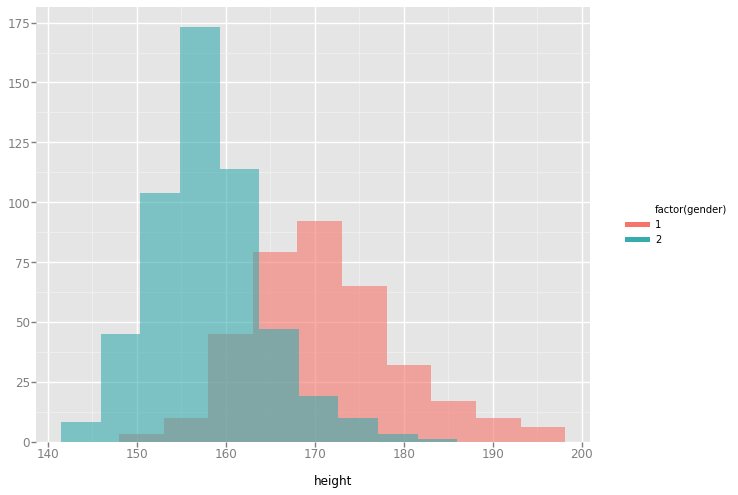

<ggplot: (8760316177135)>

In [105]:
samp_size=len(all_meta)
train_ratio = 0.75
#train_ratio = 0.9
train_size = int(samp_size * train_ratio)

import random
val_idx = random.sample(range(samp_size), samp_size-train_size)
print(samp_size,train_size)
ggplot( aes(x='height',fill='factor(gender)'),data=all_meta.loc[val_idx]) +\
    geom_histogram(alpha=0.6)

## Random Forest

In [156]:
from sklearn.ensemble import RandomForestRegressor

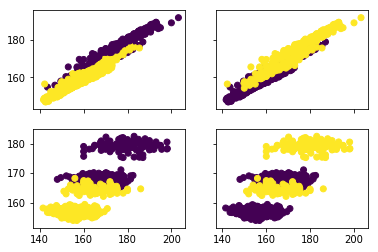

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[16:57:50<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 0ac21f73-e2e2-4756-9da0-eee9f5390649



          
  0% |          |[16:57:50<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 0ac21f73-e2e2-4756-9da0-eee9f5390649



          
  0% |          |[16:57:51<?]  ?% /s] 
100% |██████████|[00:01<00:00]  98.17% /s] 
          
  0% |          |[16:57:51<?]  ?% /s]  /s] 


CrowdAI.Event.Job.INFO : (0ac21f73-e2e2-4756-9da0-eee9f5390649) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.389142137054 ; MSE : 62.0967454022
CrowdAI.Event.Job.COMPLETE : 0ac21f73-e2e2-4756-9da0-eee9f5390649	   🍺 


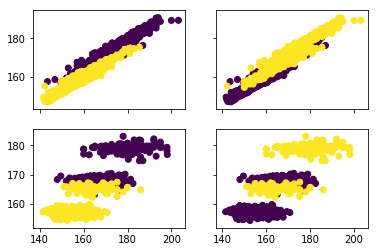

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[16:57:59<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : f784e2aa-25ce-46ba-8207-5913cbd8d857



          
  0% |          |[16:57:59<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : f784e2aa-25ce-46ba-8207-5913cbd8d857



          
  0% |          |[16:58:00<?]  ?% /s] 
100% |██████████|[00:01<00:00]  92.20% /s] 
          
  0% |          |[16:58:00<?]  ?% /s]  /s] 


CrowdAI.Event.Job.INFO : (f784e2aa-25ce-46ba-8207-5913cbd8d857) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.423537702887 ; MSE : 58.6002647574
CrowdAI.Event.Job.COMPLETE : f784e2aa-25ce-46ba-8207-5913cbd8d857	   🍺 


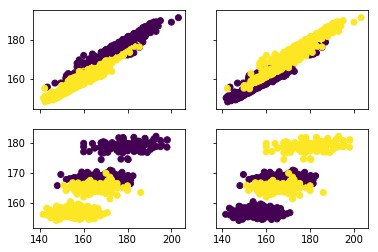

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[16:58:06<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : dd65ae19-d11d-4158-be54-593b03b96ec2



          
  0% |          |[16:58:06<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : dd65ae19-d11d-4158-be54-593b03b96ec2



          
  0% |          |[16:58:06<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.27% /s] 
          
  0% |          |[16:58:06<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (dd65ae19-d11d-4158-be54-593b03b96ec2) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.411759929011 ; MSE : 59.7975341553
CrowdAI.Event.Job.COMPLETE : dd65ae19-d11d-4158-be54-593b03b96ec2	   🍺 


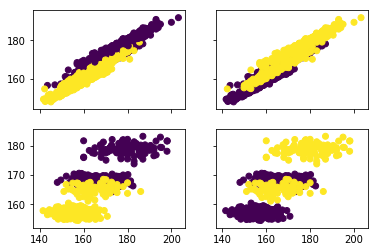

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[16:58:11<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : a59bb36b-09c3-4fac-b4b7-1bcaa7351eff



          
  0% |          |[16:58:12<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : a59bb36b-09c3-4fac-b4b7-1bcaa7351eff



          
  0% |          |[16:58:12<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.36% /s] 
          
  0% |          |[16:58:12<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (a59bb36b-09c3-4fac-b4b7-1bcaa7351eff) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.438238758986 ; MSE : 57.1058291561
CrowdAI.Event.Job.COMPLETE : a59bb36b-09c3-4fac-b4b7-1bcaa7351eff	   🍺 


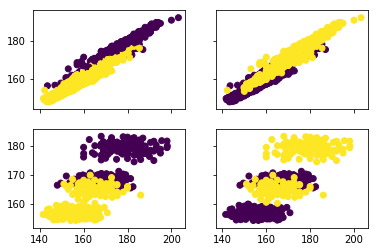

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[16:58:16<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 33dbfcce-f301-42f4-82fe-bc03d91e2522



          
  0% |          |[16:58:17<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 33dbfcce-f301-42f4-82fe-bc03d91e2522



          
  0% |          |[16:58:17<?]  ?% /s] 
100% |██████████|[00:00<00:00]  102.15% /s] 
          
  0% |          |[16:58:17<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (33dbfcce-f301-42f4-82fe-bc03d91e2522) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.417158263699 ; MSE : 59.2487665368
CrowdAI.Event.Job.COMPLETE : 33dbfcce-f301-42f4-82fe-bc03d91e2522	   🍺 


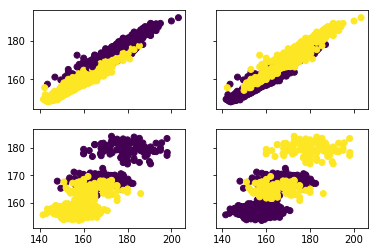

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[16:58:21<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 3a8518a5-8bec-489b-90c5-4b032c4b7979



          
  0% |          |[16:58:21<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 3a8518a5-8bec-489b-90c5-4b032c4b7979



          
  0% |          |[16:58:22<?]  ?% /s] 
100% |██████████|[00:00<00:00]  106.18% /s] 
          
  0% |          |[16:58:22<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (3a8518a5-8bec-489b-90c5-4b032c4b7979) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.378273141194 ; MSE : 63.2016329867
CrowdAI.Event.Job.COMPLETE : 3a8518a5-8bec-489b-90c5-4b032c4b7979	   🍺 


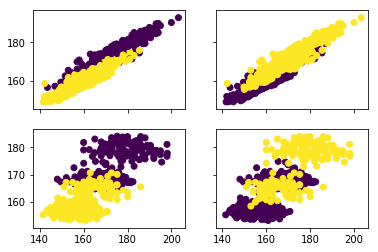

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[16:58:26<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : e0b6d745-159f-4b56-b614-2f97f6236de9



          
  0% |          |[16:58:26<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : e0b6d745-159f-4b56-b614-2f97f6236de9



          
  0% |          |[16:58:27<?]  ?% /s] 
100% |██████████|[00:00<00:00]  108.48% /s] 
          
  0% |          |[16:58:27<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (e0b6d745-159f-4b56-b614-2f97f6236de9) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.384790681165 ; MSE : 62.5390925747
CrowdAI.Event.Job.COMPLETE : e0b6d745-159f-4b56-b614-2f97f6236de9	   🍺 


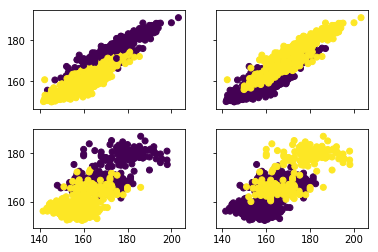

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[16:58:31<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 3200c20d-52eb-4530-8fde-c1e266665922



          
  0% |          |[16:58:31<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 3200c20d-52eb-4530-8fde-c1e266665922



          
  0% |          |[16:58:32<?]  ?% /s] 
100% |██████████|[00:00<00:00]  101.72% /s] 
          
  0% |          |[16:58:32<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (3200c20d-52eb-4530-8fde-c1e266665922) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.364125365811 ; MSE : 64.6398248465
CrowdAI.Event.Job.COMPLETE : 3200c20d-52eb-4530-8fde-c1e266665922	   🍺 


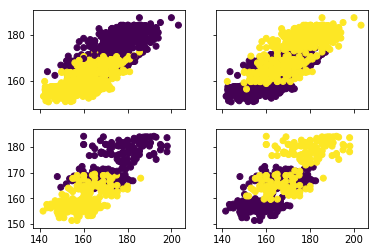

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[16:58:36<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : f945ffd3-1fd6-410f-a84f-80b54c707149



          
  0% |          |[16:58:36<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : f945ffd3-1fd6-410f-a84f-80b54c707149



          
  0% |          |[16:58:36<?]  ?% /s] 
100% |██████████|[00:00<00:00]  111.03% /s] 
          
  0% |          |[16:58:36<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (f945ffd3-1fd6-410f-a84f-80b54c707149) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.358270196877 ; MSE : 65.2350319424
CrowdAI.Event.Job.COMPLETE : f945ffd3-1fd6-410f-a84f-80b54c707149	   🍺 


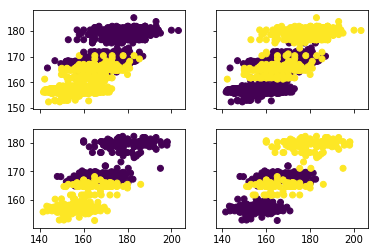

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[16:58:40<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : 845069eb-e87e-433d-8f15-f09bad634ed0



          
  0% |          |[16:58:40<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : 845069eb-e87e-433d-8f15-f09bad634ed0



          
  0% |          |[16:58:41<?]  ?% /s] 
100% |██████████|[00:00<00:00]  104.41% /s] 
          
  0% |          |[16:58:41<?]  ?% /s] % /s] 


CrowdAI.Event.Job.INFO : (845069eb-e87e-433d-8f15-f09bad634ed0) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.395113315211 ; MSE : 61.4897453908
CrowdAI.Event.Job.COMPLETE : 845069eb-e87e-433d-8f15-f09bad634ed0	   🍺 


In [157]:
score_list={}
submit={}
for n in [7726, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10]:
    var_idx = list(range(n))+list([7726,7727])
    ((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, X.iloc[:,var_idx].values, np.array(y))
    x_test = df_test.iloc[:,var_idx].values
  
    rf = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                                n_jobs=-1, oob_score=True)
    rf.fit(trn, y_trn)
    

    preds = np.clip(rf.predict(trn),145,195)
    preds1 = np.clip(rf.predict(val),145,195)

    score_list[n]=(rf.score(trn, y_trn), rf.score(val, y_val))

    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
    ax1.scatter(y_trn,preds,c=trn[:,-2], marker='o')
    ax2.scatter(y_trn,preds,c=trn[:,-1], marker='o')
    ax3.scatter(y_val,preds1,c=val[:,-2], marker='o')
    ax4.scatter(y_val,preds1,c=val[:,-1], marker='o')
    plt.show()

    heights = np.clip(rf.predict(x_test),145,195).tolist()
    # Create the challenge object by authentication with crowdAI with your API_KEY
    challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
    submit[n]=challenge.submit(heights)
    challenge.disconnect()


In [158]:
score_list

{7726: (0.9357013211874846, 0.6120117755820358),
 5000: (0.934008633965682, 0.6161503153934631),
 2000: (0.9314624002551604, 0.6216246013829978),
 1000: (0.9309064804833995, 0.60967901803535),
 500: (0.9308250776915717, 0.6133699422722685),
 200: (0.9222609116360915, 0.5986320858503165),
 100: (0.9095978389751086, 0.5922694674417623),
 50: (0.8676503612512116, 0.5853376147638147),
 20: (0.6717117403193738, 0.6065853546253821),
 10: (0.6331155541696407, 0.6133322345341987)}

In [3]:
preds = m.predict(val)

NameError: name 'm' is not defined

In [285]:
m.score(trn, y_trn), m.score(val, y_val), m.oob_score_

(0.8439407662079724, 0.11804699118137751, 0.0804589756030738)

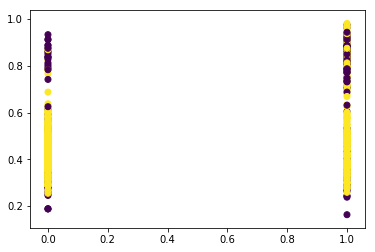

In [286]:
plt.scatter(y_val,preds,c=list(val[:,7726]), marker='o')

In [2]:
heights = m.predict(df_test).tolist()
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
challenge.submit(heights)
challenge.disconnect()

NameError: name 'm' is not defined

## NN1

In [1]:
cat_vars = ['gender','nationality']
contin_vars = X.columns[:-2]

NameError: name 'X' is not defined

In [194]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, X, y.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test,is_reg=False)

In [195]:
cat_sz = [(c, 3) for c in cat_vars]
cat_sz

[('gender', 3), ('nationality', 3)]

In [196]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs

[(3, 2), (3, 2)]

In [197]:
y_range = (130,210)

In [198]:
#m = md.get_learner(emb_szs, len(X.columns)-len(cat_vars),
#                   0, 1, [256,128,64], [0.3,0.5,0.3], y_range=y_range)

In [213]:
m = md.get_learner(emb_szs, len(X.columns)-len(cat_vars),
                   0, 1, [128,64,16], [0,0.1,0.1])

In [214]:
lr = 1e-3

In [227]:
m.lr_find()

 43%|████▎     | 9/21 [00:00<00:00, 87.59it/s, loss=46.3]


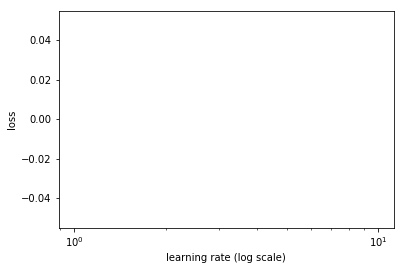

In [228]:
m.sched.plot()

In [229]:
m.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss                            
    0      55.250753  62.687112 
    1      58.415913  64.20576                             
    2      56.39197   62.964787                          



[array([62.96479])]

In [230]:
m.fit(lr, 10, cycle_len=1)

epoch      trn_loss   val_loss                            
    0      56.733091  62.744966 
    1      49.164127  62.002885                            
    2      44.179577  61.256397                          
    3      42.012801  60.872404                            
    4      39.967664  60.322566                          
    5      43.533669  60.629964                            
    6      42.154946  58.021469                          
    7      41.29138   57.008608                          
    8      40.034128  56.676835                          
    9      40.916238  60.169139                            



[array([60.16914])]

In [983]:
m.save('nn_model1') #R2=0.355

 24%|██▍       | 12/50 [00:00<00:00, 119.82it/s, loss=43.2]

epoch      trn_loss   val_loss                             
    0      80.888028  151.194055



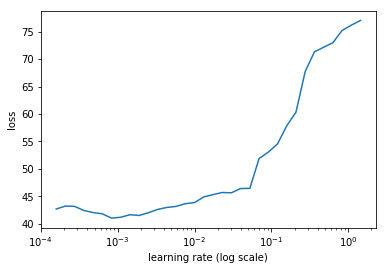

In [984]:
m.lr_find()
m.sched.plot()

In [985]:
m.fit(0.01, 3, cycle_len=1)

epoch      trn_loss   val_loss                             
    0      50.995664  42.544632 
    1      43.480691  41.338056                            
    2      42.126355  41.464497                            



[array([41.4645])]

In [1026]:
m.fit(lr, 10, cycle_len=1)

epoch      trn_loss   val_loss                            
    0      57.78584   49.578513 
    1      53.775634  46.085355                            
    2      51.614049  43.825487                            
    3      50.302809  40.732563                            
    4      49.565065  43.737697                           
    5      47.954103  40.983987                            
    6      47.264173  38.763312                          
    7      46.305101  38.572067                            
    8      45.49319   38.968085                            
    9      46.022123  39.092998                            



[array([39.093])]

In [987]:
m.save('nn_model2') #R2=0.436

In [9]:
m.load('nn_model2')

NameError: name 'm' is not defined

In [231]:
# Predict the heights for the test set
heights = m.predict(True)
heights=heights.reshape(137)
heights = heights.tolist()
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")
challenge.submit(heights)
challenge.disconnect()

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : adf40834-afd7-4b4d-bb1d-a0116c14b777


  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : adf40834-afd7-4b4d-bb1d-a0116c14b777


100% |██████████|[00:00<00:00]  109.49% /s] 


CrowdAI.Event.Job.INFO : (adf40834-afd7-4b4d-bb1d-a0116c14b777) Scores Submitted Successfully ! Coefficient of Determination(R^2) : 0.073840333075 ; MSE : 94.1487447856
CrowdAI.Event.Job.COMPLETE : adf40834-afd7-4b4d-bb1d-a0116c14b777	   🍺 


## NN2

In [972]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(y)
y_range = (140,200)

In [317]:
maf=pd.read_csv('../predict_height/lib/maf.csv',index_col=0)

In [321]:
sum([x in maf.index for x in all_bim.snp])

628

In [792]:
# Instantiate a linear model
x_train=X
y_train=y
x_test=df_test
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Predict the heights for the test set
heights = regr.predict(x_test)

In [793]:
#Convert heights from np.array to a list (to ensure it is JSON serializable)
challenge = crowdai.Challenge("OpenSNPChallenge2017", "02f5a9824254b85a068fbdfbb1298b8e")

heights = heights.tolist()
challenge.submit(heights)
challenge.disconnect()

CrowdAI.Event.Authentication : Authenticating for challenge = OpenSNPChallenge2017
CrowdAI.Event.Connection.CONNECTED



  0% |          |[00:00<?]  ?% /s] 

CrowdAI.Event.Authentication.SUCCESS : Authentication Successful



          
  0% |          |[16:49<?]  ?% /s] 

CrowdAI.Event.Job.ENQUEUED : bc1ef311-9598-4a6c-a9a2-cce75662d779



          
  0% |          |[16:49<?]  ?% /s] 

CrowdAI.Event.Job.RUNNING : bc1ef311-9598-4a6c-a9a2-cce75662d779



          
  0% |          |[16:49<?]  ?% /s] 
100% |██████████|[00:00<00:00]  102.69% /s] 
          
  0% |          |[16:49<?]  ?% /s] .69% /s] 


CrowdAI.Event.Job.INFO : (bc1ef311-9598-4a6c-a9a2-cce75662d779) Scores Submitted Successfully ! Coefficient of Determination(R^2) : -0.0365818509984 ; MSE : 105.373709981
CrowdAI.Event.Job.COMPLETE : bc1ef311-9598-4a6c-a9a2-cce75662d779	   🍺 


In [ ]:
import preprocess
import argparse
import models


def init_args():
    parser = argparse.ArgumentParser(description='Train and save models')
    parser.add_argument('train_datesets', help='Input csv file for training output from parse_inputs.py')
    parser.add_argument('-m', '--model', help='Train model, comma to separate', default='gbr')
    parser.add_argument('-d', '--model-dir', help='Model directory', default='models')
    parser.add_argument('-l', '--list-models', help='List available models', action='store_true')
    args = parser.parse_args()
    return args


def main():
    args = init_args()
    if args.list_models:
        print('\n'.join(models.get_model_names()))
        exit()
    m = args.model.split(',')
    dict_m = models.get_models(m)
    x, y = preprocess.load_data(args.train_datesets)
    for model_name in dict_m:
        model = dict_m[model_name]
        print('Training model %s' % model_name)
        model.fit(x, y)
        models.save_model(model, model_name, args.model_dir)
        print('Train finished, save to %s' % args.model_dir)

